## Data Science and On-Time Delivery: 
               Do more by doing less
Lucia Zhang | Apr. 10, 2023               
#### Regression on the DataCo Dataset

- Dataset: roughly 180k transactions from DataCo Supply Chain, the e-commerce business during 2015-2018. The company's major products include clothing,footwear,sports supplies as well as electronics. 

- Problem statement: Poor On-Time Delivery negatively 
    - impact customer satisfaction & loyalty 
    - the company's bottom line.    
    - negative review can do serious damage

- Business statement: 
    - Using machine learning algorithms, my models will take real-time data-driven insights
    - Optimize and facilitate timely delivery in most effective way
#### Note book 1 of 1

## Part 1 Data Cleaning and  Exploration


### Data Undertanding and Cleaning 
The first step as always is to read in the data and get a feel of what we are working with

In [1]:
#Importing Libraries and Packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data/dataco_supply_chain.csv")  
df.head(10)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   
5  TRANSFER                         6                              4   
6     DEBIT                         2                              1   
7  TRANSFER                         2                              1   
8      CASH                         3                              2   
9      CASH                         2                              1   

   Benefit per order  Sales per customer    Delivery Status  \
0          91.250000          314.640015   Advance shipping   
1        -249.089996          311.359985      Late delivery   
2        -247.779999          309.720001   Shipping on time   
3          22.860001          304.809998   Advance shipping   
4         134.210007          298.250000   Advance shipping   
5          18.580000          294.980011  Shipping canceled   
6          95.180000          288.420013      Late delivery   
7          68.430000          285.140015      Late delivery   
8         133.720001          278.589996      Late delivery   
9         132.149994          275.309998      Late delivery   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   
5                   0           73  Sporting Goods     Tonawanda  ...   
6                   1           73  Sporting Goods        Caguas  ...   
7                   1           73  Sporting Goods         Miami  ...   
8                   1           73  Sporting Goods        Caguas  ...   
9                   1           73  Sporting Goods     San Ramon  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   
5           NaN            1360                  73                  NaN   
6           NaN            1360                  73                  NaN   
7           NaN            1360                  73                  NaN   
8           NaN            1360                  73                  NaN   
9           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
5  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
6  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
7  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
8  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
9  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product

In [3]:
# Sanity check
df.shape

(180519, 53)

In [4]:
print(f'Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataframe has 180519 rows and 53 columns.


#### Next steps:

- Check and understand datatypes,their formats and distributions
- Check for duplicate rows
- Check for missing data
- Check and remove duplicate/redundant columns

### Step 1: Check and Understand data types, formats and distributions

In [5]:
# What is in the columns?
# Check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

#### Obseration:
- Column 'Product Description' is blank, and not relevant to the shipping status tracking, we may consider to drop this column after checking the correlation matrix

In [6]:
#Rename order date and shipping date to keep them consistant with other columns.
df['Order_Date'] = df['order date (DateOrders)']
df['Shipping_Date']=df['shipping date (DateOrders)']

In [7]:
# Drop the old columns
df.drop(['order date (DateOrders)', 'shipping date (DateOrders)'], axis=1, inplace=True)

In [8]:
#mondify time to year, month and day
df['Order_year'] = pd.DatetimeIndex(df['Order_Date']).year
df['Order_month'] = pd.DatetimeIndex(df['Order_Date']).month
df['Order_day'] = pd.DatetimeIndex(df['Order_Date']).day
df['Shipping_year'] = pd.DatetimeIndex(df['Shipping_Date']).year
df['Shipping_month'] = pd.DatetimeIndex(df['Shipping_Date']).month
df['Shipping_day'] = pd.DatetimeIndex(df['Shipping_Date']).day

# Drop the old columns
df.drop(['Order_Date', 'Shipping_Date'], axis=1, inplace=True)
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

   Product Name Product Price Product Status   Shipping Mode Order_year  \
0  Smart watch         327.75              0  Standard Class       2018   
1  Smart watch         327.75              0  Standard Class       2018   
2  Smart watch         327.75              0  Standard Class       2018   
3  Smart watch         327.75              0  Standard Class       2018   
4  Smart watch         327.75              0  Standard Class       2018   

  Order_month Order_day Shipping_year Shipping_month  Shipping_day  
0           1        31          2018              2             3  
1           1        13          2018              1            18  
2           1        13          2018              1            17  
3           1        13          2018              1            16  
4           1        13          2018              1            15  

[5 rows x 57 columns]

In [9]:
#sanity check
df.shape

(180519, 57)

In [10]:
# Check the basic statistics of the numerical columns
df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
std                    1.623722                       1.374449   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
std           104.433526          120.043670            0.497664   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   

         Category Id    Customer Id  Customer Zipcode  Department Id  \
count  180519.000000  180519.000000     180516.000000  180519.000000   
mean       31.851451    6691.379495      35921.126914       5.443460   
std        15.640064    4162.918106      37542.461122       1.629246   
min         2.000000       1.000000        603.000000       2.000000   
25%        18.000000    3258.500000        725.000000       4.000000   
50%        29.000000    6457.000000      19380.000000       5.000000   
75%        45.000000    9779.000000      78207.000000       7.000000   
max        76.000000   20757.000000      99205.000000      12.000000   

            Latitude  ...  Product Category Id  Product Description  \
count  180519.000000  ...        180519.000000                  0.0   
mean       29.719955  ...            31.851451                  NaN   
std         9.813646  ...            15.640064                  NaN   
min       -33.937553  ...             2.000000                  NaN   
25%        18.265432  ...            18.000000                  NaN   
50%        33.144863  ...            29.000000                  NaN   
75%        39.279617  ...            45.000000                  NaN   
max        48.781933  ...            76.000000                  NaN   

       Product Price  Product Status     Order_year    Order_month  \
count  180519.000000        180519.0  180519.000000  180519.000000   
mean      141.232550             0.0    2015.971150       6.235449   
std       139.732492             0.0       0.829429       3.403571   
min         9.990000             0.0    2015.000000       1.000000   
25%        50.000000             0.0    2015.000000       3.000000   
50%        59.990002             0.0    2016.000000       6.000000   
75%       199.990005             0.0    2017.000000       9.000000   
max      1999.989990             0.0    2018.000000      12.000000   

           Order_day  Shipping_year  Shipping_month   Shipping_day  
count  180519.000000  180519.000000   180519.000000  180519.000000  
mean       15.739346    2015.979404        6.252494      15.702170  
std         8.821895       0.831962        3.398391       8.808808  
min         1.000000    2015.000000        1.000000       1.000000  
25%         8.000000    2015.000000        3.000000       8.000000  
50%        16.000000    2016.000000        6.000000      16.000000  
75%        23.000000    2017.000000        9.000000      23.000000  
max        31.000000    2018.000000       12.000000      31.000000  

[8 rows x 35 columns]

#### Observation:    
- the mean and std of Days for shipment (scheduled) is < Days for shipping (real). it suggests that there may be delays or unexpected events that occur during the shipping process, leading to longer actual delivery times than originally planned.

- only 25%  and 50% days scheduled >= Days for shipping (real), and 50% and 75%: (scheduled) <=  Days for shipping (real). It suggests that there may be some variability in the accuracy of delivery time estimates. To improve the accuracy of delivery time estimates and reduce the incidence of late or canceled shipments, it might be worth exploring the factors that contribute to this variability, such as transportation mode, distance, and shipment size.

### EDA:  Investigating  Columns

In [11]:
df['Order_month'].value_counts()

1     17979
5     15976
7     15922
3     15919
8     15912
9     15489
4     15435
6     15139
2     14529
10    12955
12    12764
11    12500
Name: Order_month, dtype: int64

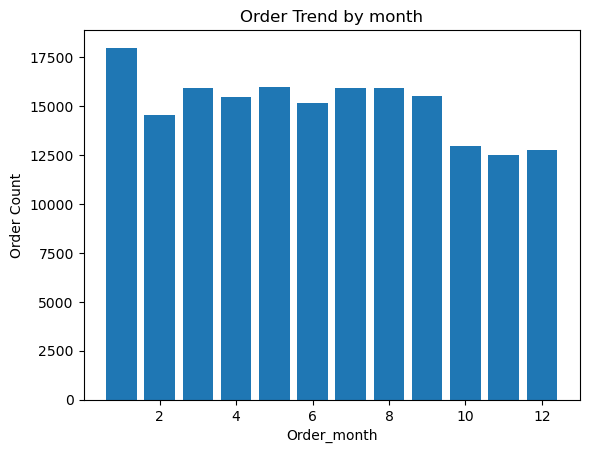

In [12]:
#plot and compare the month trend

month_counts=df['Order_month'].value_counts()

plt.bar(month_counts.index, month_counts.values)
plt.xlabel('Order_month')
plt.ylabel('Order Count')
plt.title('Order Trend by month')
plt.show()

#### Observation:
- Jan is the best month with 17979 orders,
- from Feb to Sep, order number are steady and relatively high over 15000S,
- Oct, Nov and Dec are slow seasons for the company, order number drops to 12500 by Nov as the lowest.

In [13]:
# Investigating Delivery Status column
df['Delivery Status']

0         Advance shipping
1            Late delivery
2         Shipping on time
3         Advance shipping
4         Advance shipping
                ...       
180514    Shipping on time
180515       Late delivery
180516       Late delivery
180517    Advance shipping
180518    Shipping on time
Name: Delivery Status, Length: 180519, dtype: object

In [14]:
# Check the percentage of each delivery status:
round(df['Delivery Status'].value_counts()/df.shape[0]*100, 2)

Late delivery        54.83
Advance shipping     23.04
Shipping on time     17.84
Shipping canceled     4.30
Name: Delivery Status, dtype: float64

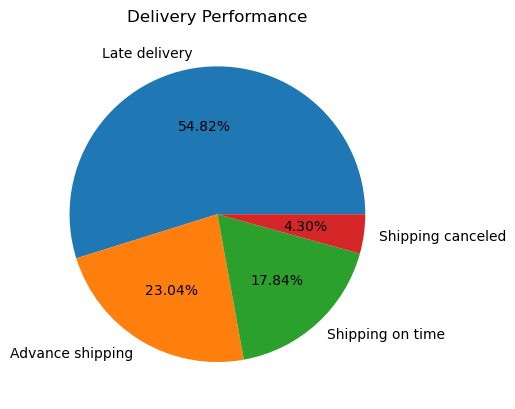

In [15]:
# PLot pie chart: 

delivery_counts = round(df['Delivery Status'].value_counts() / df.shape[0] * 100, 2)
#Create the pie chart
plt.pie(delivery_counts, labels=delivery_counts.index, autopct='%1.2f%%')
plt.title('Delivery Performance')
plt.show()

#### The Delivery Performance Summary: 
- on time: 17.84%
- early arrival: 23.04%
- late delivery: 54.83%
- canceled:      4.3%
####  Conclusion: 
- early and on time: 40.88%
- late and canceled: 59.12%
- we need investigate further why ~60% late and canceled delivery? 

In [16]:
# Investigating Late_delivery_risk column: 

df['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

#### Observation: 
- late delivery number: 98977, not late: 81842, on-time-delivery (OTD) performance indicator shows the business is not performing well at the last mile

In [17]:
# Check the percentage of On-Time Delivery (OTD) Percertage:
round(df['Late_delivery_risk'].value_counts()/df.shape[0]*100, 2)

1    54.83
0    45.17
Name: Late_delivery_risk, dtype: float64

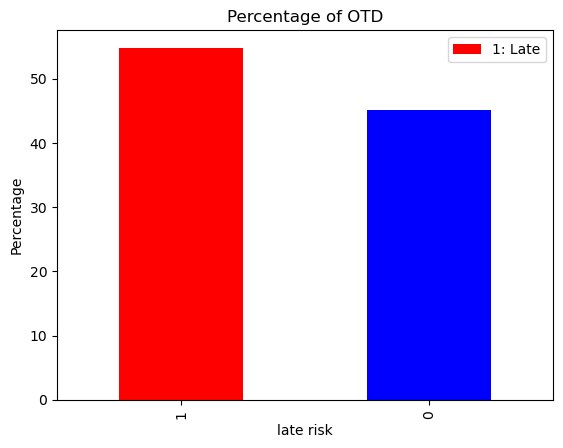

In [18]:
# Visualized  On-Time Delivery (OTD) Percertage

delivery_counts = round(df['Late_delivery_risk'].value_counts() / df.shape[0] * 100, 2)

# Create the bar plot with colored bars and a legend
ax = delivery_counts.plot(kind='bar', title='Percentage of OTD', color=['red', 'blue'])
ax.set_xlabel('late risk')
ax.set_ylabel('Percentage')
ax.legend(['1: Late', '0: Not Late',])

plt.show()

#### Findings:  The Late_delivery_risk Summary: 
- 54.83% of the shipment with late risk,
- 45.17% of the shipment with no late risk, including on time, advance (early) and canceled shipment. 
- as per data, certain portion of the canceled shipment is also late
- To out perform competitors, the DataCo has to aim 95% or above.

In [19]:
#check the distribution of real shipping days
df['Days for shipping (real)'].value_counts()

2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days for shipping (real), dtype: int64

In [20]:
#check the distribution of scheduled shipping days
df['Days for shipment (scheduled)'].value_counts()

4    107752
2     35216
1     27814
0      9737
Name: Days for shipment (scheduled), dtype: int64

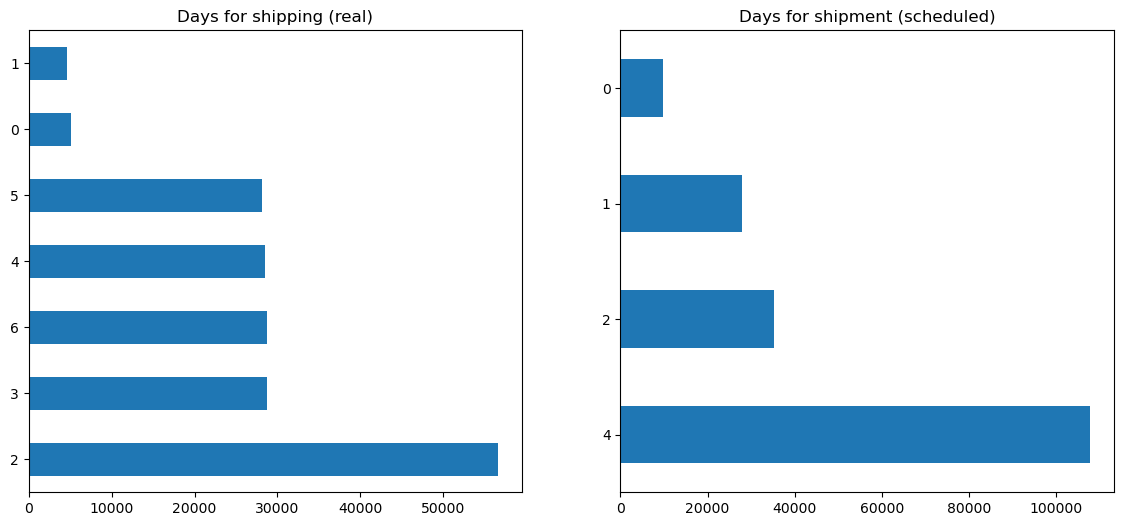

In [21]:
#plot and compare the real and scheduled shipping days

plt.subplots(1, 2, figsize=(14, 6))
plt.subplot(1,2,1)
df['Days for shipping (real)'].value_counts().plot(kind='barh')
plt.title('Days for shipping (real)')
plt.subplot(1,2,2)
df['Days for shipment (scheduled)'].value_counts().plot(kind='barh')
plt.title('Days for shipment (scheduled)')
plt.show()

#### Observation:
- The actually delivery time don’t match with scheduled days, the maximum scheduled days is 4, but in reality, it takes up to 6 days, indicating at least 2 days off 
- scheduled 1-day for ~30,000 shipment, but less than 5,000 meet the expectation 
- scheduled 4-day for ~150,000 shipment, but less than 30,000 meet the expectation 

<AxesSubplot:xlabel='Days for shipment (scheduled)', ylabel='Days for shipping (real)'>

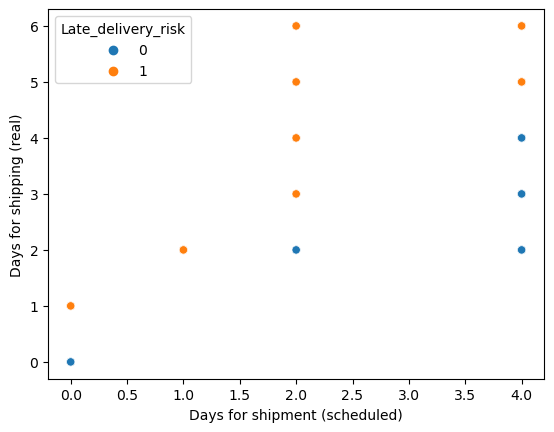

In [22]:
# Analyze the relationship btw Days for shipping (real), Days for shipment (scheduled), Late_delivery_risk
sns.scatterplot(x="Days for shipment (scheduled)",y="Days for shipping (real)",hue="Late_delivery_risk",data=df)

#### Observations: 
- It indicates that 'Days for shipment (scheduled)' as 2 days has higher risk of late delivery, it actually takes 3,4,5,6 days to arrive;  
- shipment (scheduled) as 4 days has lower risk of late delivery, it actually takes 2,3,4 days to arrive early and on time, takes 5,6 days and late for 1 day or 2 days. 
- It looks like 'Days for shipment (scheduled)' needs to be adjusted to reflect the actual days for delivery, or needs a better way to buffer and set realistic on time delivery goals.
- It's worth investigating the carrier's performance together with internal order-fulfilment and shipping process 

In [23]:
# Create a new column to indicate whether a delivery was late or not: 
# turn Delivery Status into a binary column:

df2=df.copy()
df2['late_delivery'] = df2['Delivery Status'].apply(lambda x: 1 if x=='Late delivery' else 0)
df2.head(10)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   
5  TRANSFER                         6                              4   
6     DEBIT                         2                              1   
7  TRANSFER                         2                              1   
8      CASH                         3                              2   
9      CASH                         2                              1   

   Benefit per order  Sales per customer    Delivery Status  \
0          91.250000          314.640015   Advance shipping   
1        -249.089996          311.359985      Late delivery   
2        -247.779999          309.720001   Shipping on time   
3          22.860001          304.809998   Advance shipping   
4         134.210007          298.250000   Advance shipping   
5          18.580000          294.980011  Shipping canceled   
6          95.180000          288.420013      Late delivery   
7          68.430000          285.140015      Late delivery   
8         133.720001          278.589996      Late delivery   
9         132.149994          275.309998      Late delivery   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   
5                   0           73  Sporting Goods     Tonawanda  ...   
6                   1           73  Sporting Goods        Caguas  ...   
7                   1           73  Sporting Goods         Miami  ...   
8                   1           73  Sporting Goods        Caguas  ...   
9                   1           73  Sporting Goods     San Ramon  ...   

  Product Price Product Status   Shipping Mode  Order_year Order_month  \
0        327.75              0  Standard Class        2018           1   
1        327.75              0  Standard Class        2018           1   
2        327.75              0  Standard Class        2018           1   
3        327.75              0  Standard Class        2018           1   
4        327.75              0  Standard Class        2018           1   
5        327.75              0  Standard Class        2018           1   
6        327.75              0     First Class        2018           1   
7        327.75              0     First Class        2018           1   
8        327.75              0    Second Class        2018           1   
9        327.75              0     First Class        2018           1   

  Order_day Shipping_year Shipping_month Shipping_day  late_delivery  
0        31          2018              2            3              0  
1        13          2018              1           18              1  
2        13          2018              1           17              0  
3        13          2018              1           16              0  
4        13          2018              1           15              0  
5        13          2018              1           19              0  
6        13          2018              1           15              1  
7        13          2018              1           15              1  
8        13          2018              1           16              1  
9        13          2018              1           15              1  

[10 rows x 58 columns]

In [24]:
df2['late_delivery'].value_counts()

1    98977
0    81542
Name: late_delivery, dtype: int64

In [25]:
x=98977/81542
print('the late delivery and non-late delivery ratio:', x)

the late delivery and non-late delivery ratio: 1.2138161928821958


In [26]:
late_rate=round(df2['late_delivery'].value_counts() /df2.shape[0]*100, 2)
late_rate

1    54.83
0    45.17
Name: late_delivery, dtype: float64

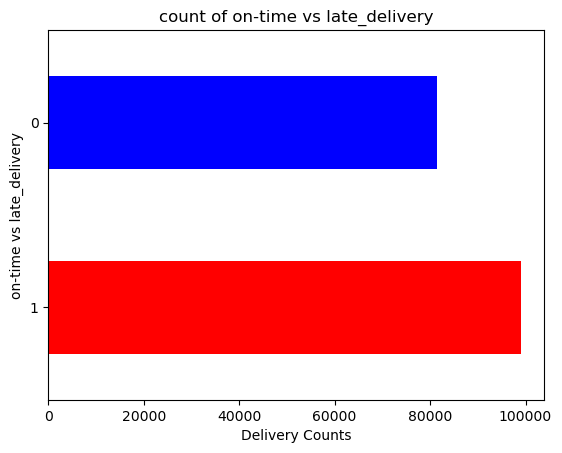

In [27]:
# graph the delivery split between those on-time and late-delivery 

df2['late_delivery'].value_counts().plot(kind='barh', color=['red', 'blue'])
plt.title('count of on-time vs late_delivery')
plt.xlabel('Delivery Counts')
plt.ylabel('on-time vs late_delivery')
plt.show()

#### Observations: 
- the late rate is  too high 54.83% while on-time-delivery rate is too low 45.17%; 
- to run a sustainabel business and to compete in e-commerce market,on-time-delivery (OTD) has to be 95% or above
- the distribution of late_delivery is the same as Late_delivery_risk. will drop one of  them to avoid duplicates, they are also correlated to Delivery Status.
#### Insights: 
- it can be concluded that for all the orders with late delivery risk is actually being delivered late,to avoid late delivery the company can either ship products faster using better shipping method or schedule more Days for delivery so customers will have realistic expectation.

In [28]:
df2['Order Country'].value_counts()

Estados Unidos       24840
Francia              13222
México               13172
Alemania              9564
Australia             8497
                     ...  
Guinea Ecuatorial        2
Kuwait                   2
Sáhara Occidental        2
Burundi                  1
Serbia                   1
Name: Order Country, Length: 164, dtype: int64

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163]),
 [Text(0, 0, 'Indonesia'),
  Text(1, 0, 'India'),
  Text(2, 0, 'Australia'

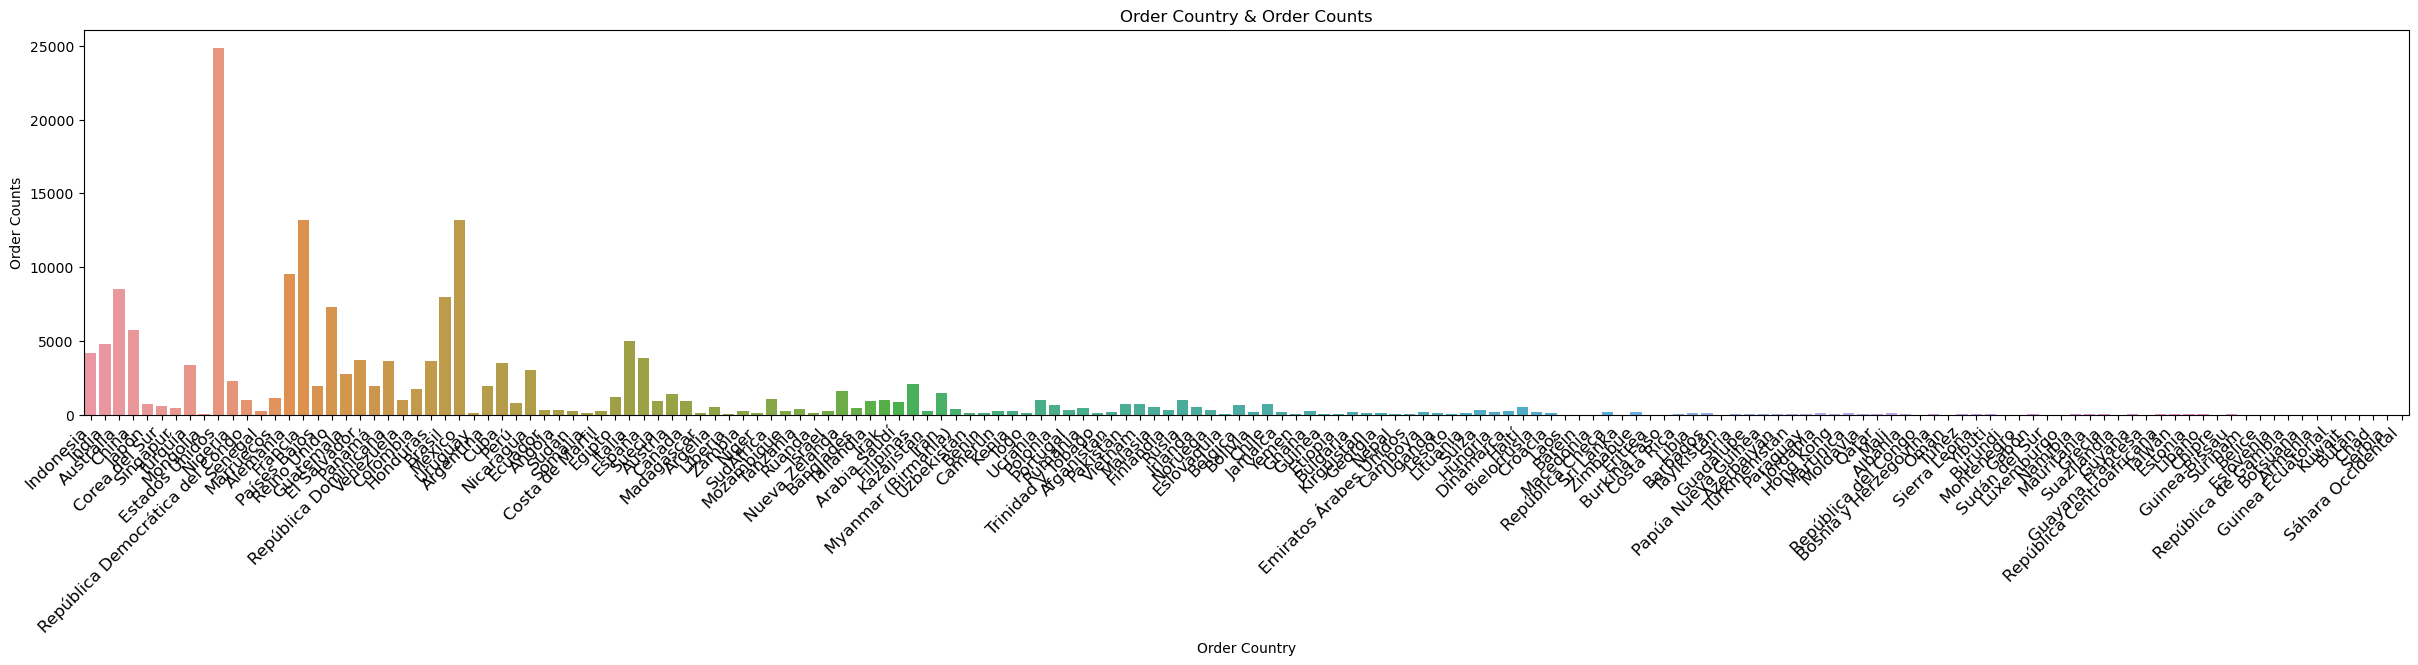

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
chart = sns.countplot(x="Order Country",data=df2)
plt.xlabel('Order Country')
plt.ylabel('Order Counts')
plt.title('Order Country & Order Counts')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

#### Observations:
- there are total 164 countries so the plot is littel crowded at x axis, but it clearly shows that less than 10 countries have more than 5000 orders, 
- the distribution is right skewed;  as outlier, around 30% of the countries have minimum orders
- let's plot and see top 20 countries with most orders

In [30]:
# the ratio of total order/shipment numbers from the top 5 countries
top5=round(100*(24840+13222+13172+9564+8497)/len(df2), 2)
print(' the order percentage from top 5 countries: ', top5)

 the order percentage from top 5 countries:  38.39


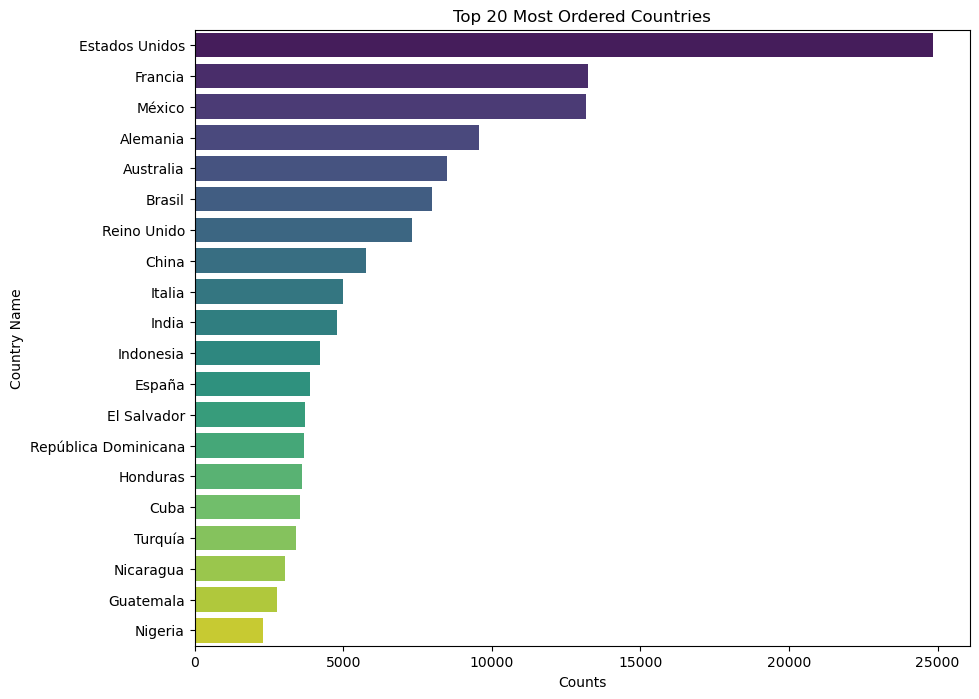

In [31]:
#top 20 most ordered Countries

top_countries = df2['Order Country'].value_counts().nlargest(20).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 20 Most Ordered Countries')
plt.xlabel('Counts')
plt.ylabel('Country Name')
plt.show()

#### Observations:
- with 24840 orders, Estados Unidos (United States) rank as No.1, almost 3 times of the total order number from No.5 Australia
- No.2 and No.3 France and Mexico with very close numbers each 13222, 13172 orders
- No.4 Alemania (Germany) with 9564 orders
- No.5 Australia with 8497 orders

#### Insights:
- 38.39% orders come from the top 5 countries 
- so prioritize delivery or marketing plans/strategies in these 5 top countries, would bring easy wins 

In [32]:
#check Order City column
df2['Order City'].value_counts()

Santo Domingo    2211
New York City    2202
Los Angeles      1845
Tegucigalpa      1783
Managua          1682
                 ... 
Libourne            1
Bergerac            1
Juliaca             1
Takasaki            1
Pernik              1
Name: Order City, Length: 3597, dtype: int64

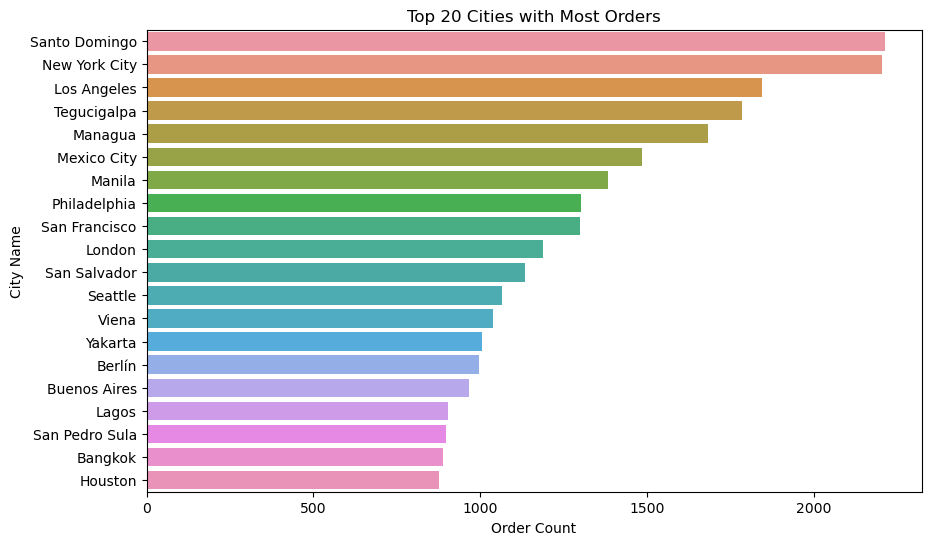

In [33]:
# get the top 20  cities with the most ordered
top_20_cities = df2['Order City'].value_counts().nlargest(20)

# create the countplot using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(y='Order City', data=df2, order=top_20_cities.index)
plt.title('Top 20 Cities with Most Orders')
plt.ylabel('City Name')
plt.xlabel('Order Count')
plt.show()

#### Observations: 
- There are total 3597 order cities, as outlier, many cities has 1 order only
- The top 5 cities with most order number as below:
    - Santo Domingo:    2211
    - New York City:    2202
    - Los Angeles:      1845
    - Tegucigalpa:      1783
    - Managua:          1682
    
#### Insights:
- this provides a guide line for logistics and supply chain planning and negotiation: where to negotiate a 3rd party logistic center to improve the delivery efficiency and shipping cost savings

In [34]:
#check Order Status column
df2['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [35]:
#check the percentage of each status
order_status=round(df2['Order Status'].value_counts() /df2.shape[0]*100, 2)
order_status

COMPLETE           32.96
PENDING_PAYMENT    22.07
PROCESSING         12.13
PENDING            11.20
CLOSED             10.87
ON_HOLD             5.43
SUSPECTED_FRAUD     2.25
CANCELED            2.05
PAYMENT_REVIEW      1.05
Name: Order Status, dtype: float64

Text(0.5, 1.0, 'Order Status & Counts')

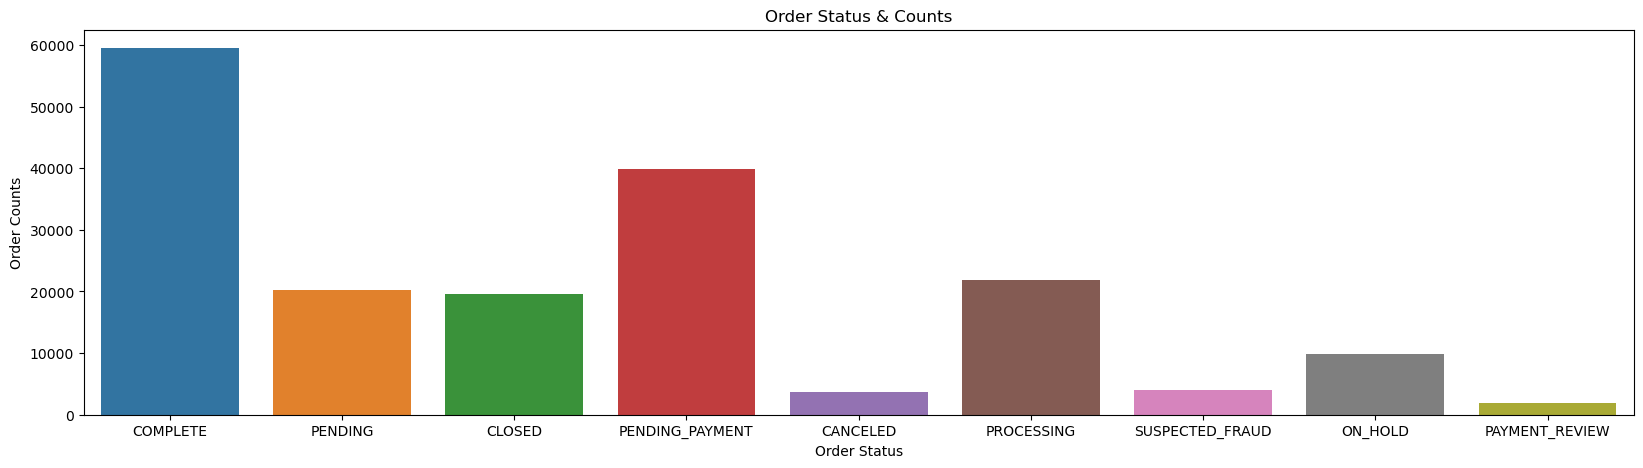

In [36]:
# plot order status

plt.figure(figsize=(20,5))
chart = sns.countplot(x="Order Status",data=df2)
plt.xlabel('Order Status')
plt.ylabel('Order Counts')
plt.title('Order Status & Counts')

#### Observation:
- around 33%, 59491 orders are complete
- 22.07%, 39832 pending-payment
- only 12.13% are in processing
- 11.20% are pending
- 10.87%, 19616 orders are closed
- 5.43%, 9804 are on hold
- rest are small portion of canceled, suspected_fraud or payment review

#### Insights:
- low processing rate 12.13% together with total 33.3% pending and pending payment, it's worth invesigating if order status relate to late delivery by slowing down the shipping process and causing delay

In [37]:
#check payment type
df2['Type'].value_counts()

DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: Type, dtype: int64

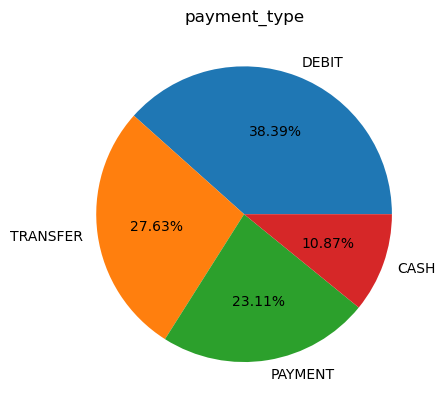

In [38]:
payment_type=round(df2['Type'].value_counts() /df2.shape[0]*100, 2)
#Create the pie chart
plt.pie(payment_type, labels=payment_type.index, autopct='%1.2f%%')
plt.title('payment_type')
plt.show()


#### Observation:
- 38.39% of payment by debit
- 27.63% by transfer
- 23.11% by payment ( credit card)
- 10.87% by cash

In [39]:
# Investigating Product Status column: it has a single value only
df2['Product Status'].value_counts()

0    180519
Name: Product Status, dtype: int64

In [40]:
# Investigating Category Name column
df2['Category Name'].value_counts()

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'Sporting Goods'),
  Text(1, 0, 'Cleats'),
  Text(2, 0, 'Shop By Sport'),
  Text(3, 0, "Women's Apparel"),
  Text(4, 0, 'Electronics'),
  Text(5, 0, 'Boxing & MMA'),
  Text(6, 0, 'Cardio Equipment'),
  Text(7, 0, 'Trade-In'),
  Text(8, 0, "Kids' Golf Clubs"),
  Text(9, 0, 'Hunting & Shooting'),
  Text(10, 0, 'Baseball & Softball'),
  Text(11, 0, "Men's Footwear"),
  Text(12, 0, 'Camping & Hiking'),
  Text(13, 0, 'Consumer Electronics'),
  Text(14, 0, 'Cameras '),
  Text(15, 0, 'Computers'),
  Text(16, 0, 'Basketball'),
  Text(17, 0, 'Soccer'),
  Text(18, 0, "Girls' Apparel"),
  Text(19, 0, 'Accessories'),
  Text(20, 0, "Women's Clothing"),
  Text(21, 0, 'Crafts'),
  Text(22, 0, "Men's Clothing"),
  Text(23, 0, 'Tennis & Racquet'),
  Text(24, 0, 'Fitne

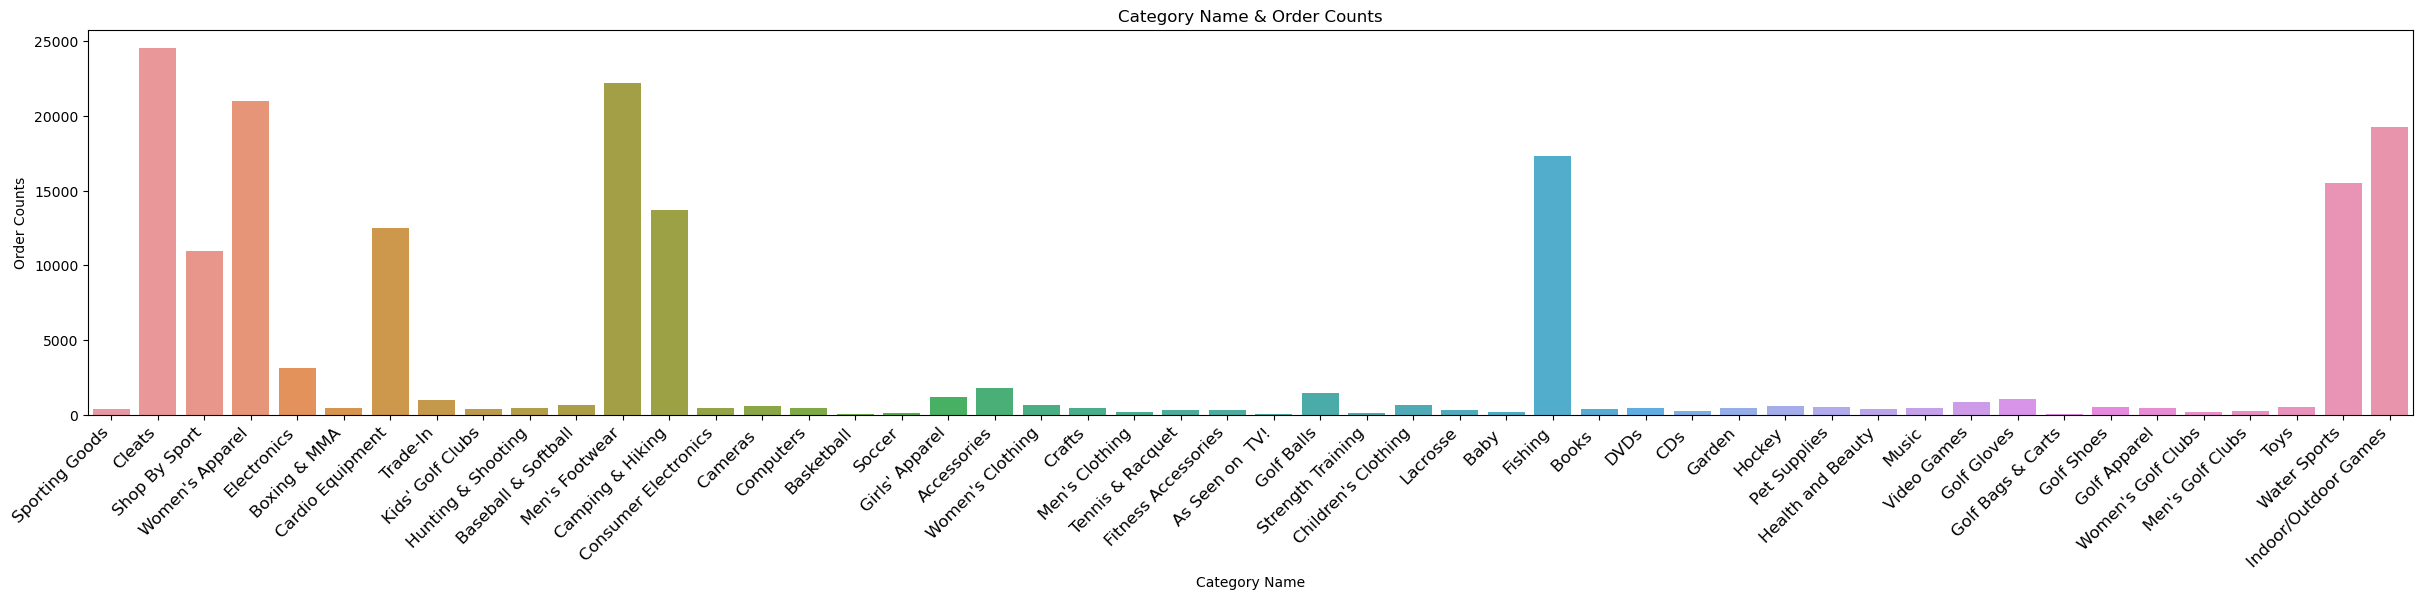

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
chart = sns.countplot(x="Category Name",data=df2)
plt.xlabel('Category Name')
plt.ylabel('Order Counts')
plt.title('Category Name & Order Counts')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

#### Observation:
- there are total 50 categories, top 6 have over 15000 orders and most ordered categories are: Cleats, Men's Footwear,Women'Apparel,Indoor/Outdoor Games,Fishing, Water Sports,
- 20% or 10 of them may contributed ~80% of the total orders, the company can expedite these categories and achieve easy wins by applying 20-80 rules. 
- basketball, soccer, as seen on tv, strength training, golf bags and carts are among the least odered categorie, their order numbers as below:
    -  Soccer:                    138
    -  Strength Training:         111
    -  As Seen on  TV!:            68
    -  Basketball:                 67
    -  Golf Bags & Carts:          61

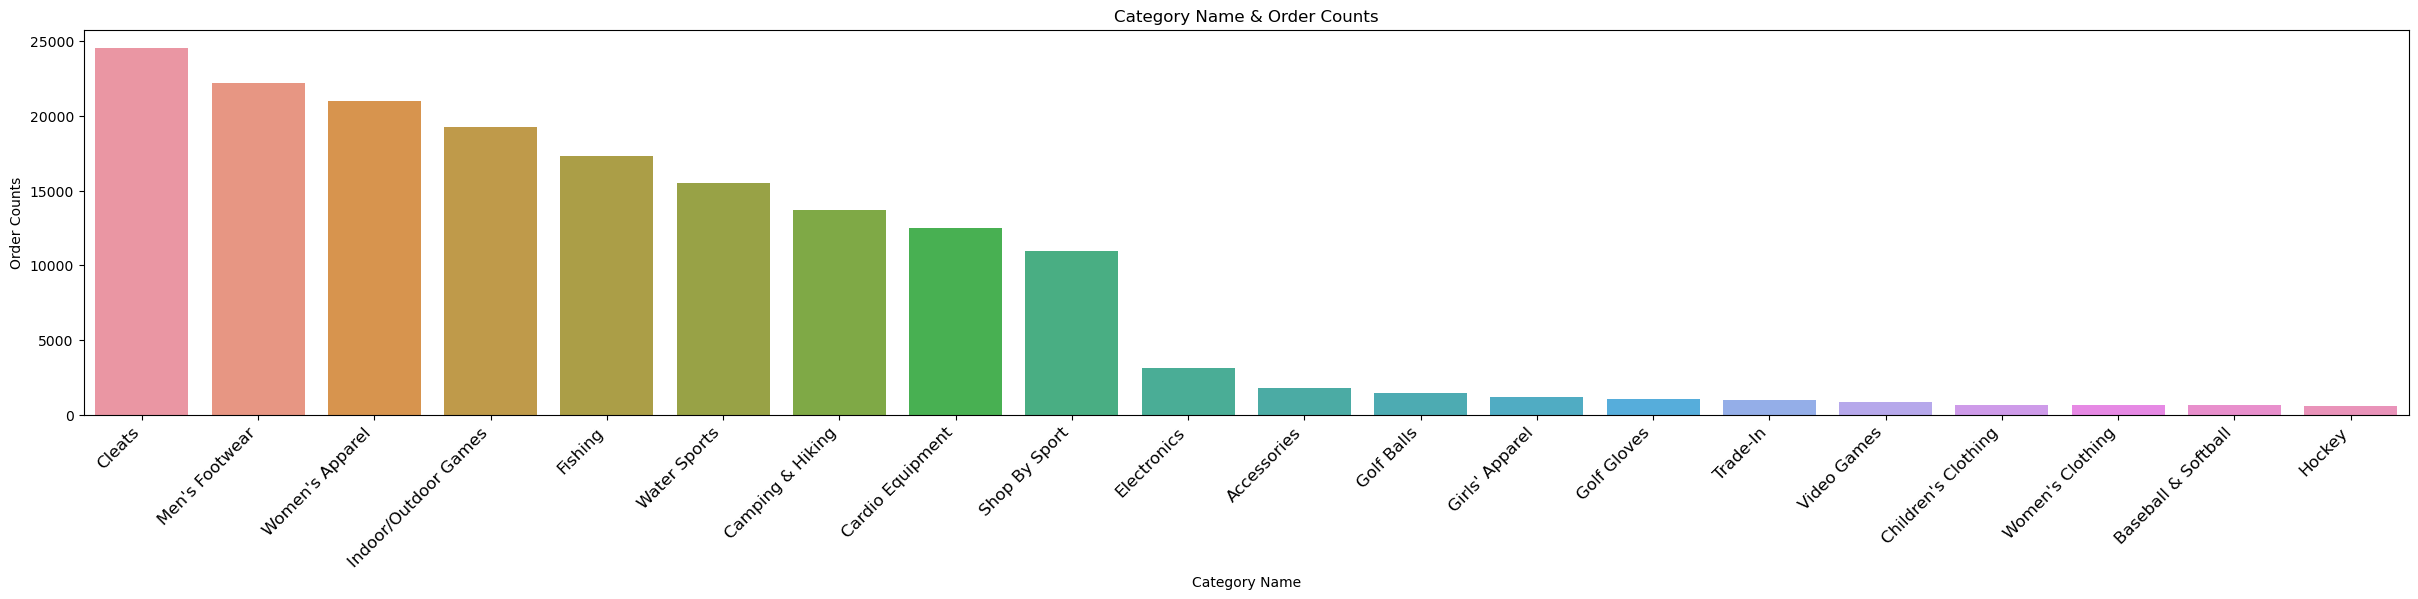

In [42]:
#top 20 most ordered Categories

plt.figure(figsize=(30,5))
chart = sns.countplot(x="Category Name", data=df2, order=df2['Category Name'].value_counts().head(20).index)
plt.xlabel('Category Name')
plt.ylabel('Order Counts')
plt.title('Category Name & Order Counts')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='large')
plt.show()

#### Observation:
- top 10 categories have most significent order numbers, beyond that, the rest categoires contribute less than 2000 orders.
- top 6 most ordered categories are: Cleats, Men's Footwear,Women'Apparel,Indoor/Outdoor Games,Fishing, Water Sports, the order numbers as below:
    - Cleats:                  24551
    - Men's Footwear:         22246
    - Women's Apparel:         21035
    - Indoor/Outdoor Games:    19298
    - Fishing:                 17325
    - Water Sports:            15540

###  Further investigating late delivery: 

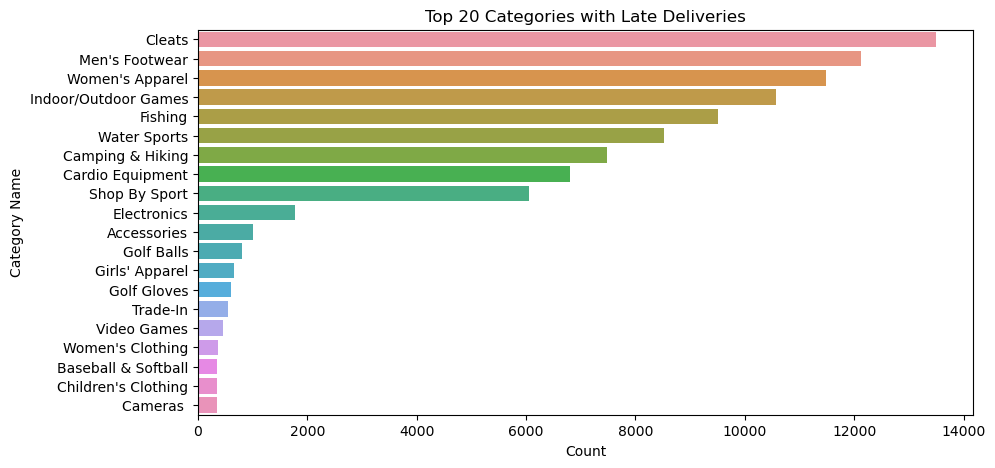

In [43]:
# Top 20 categories with the most late deliveries

# Filtering columns with late delivery status
late_delivery = df2[(df2['Delivery Status'] == 'Late delivery')]

#Top 20 late delivery categories
top_20_categories = late_delivery['Category Name'].value_counts().nlargest(20)

plt.figure(figsize=(10, 5))
sns.countplot(y="Category Name", data=late_delivery, order=top_20_categories.index)
plt.xlabel("Count")
plt.ylabel("Category Name")
plt.title("Top 20 Categories with Late Deliveries")
plt.show()


### Findings: 
- Cleats,  Men's Footware, Women's Apparel, Indoor/Outdoor Games, Fishing are the top 5 categories with most orders, 
- hence the most late delivery are also among these categoires too.

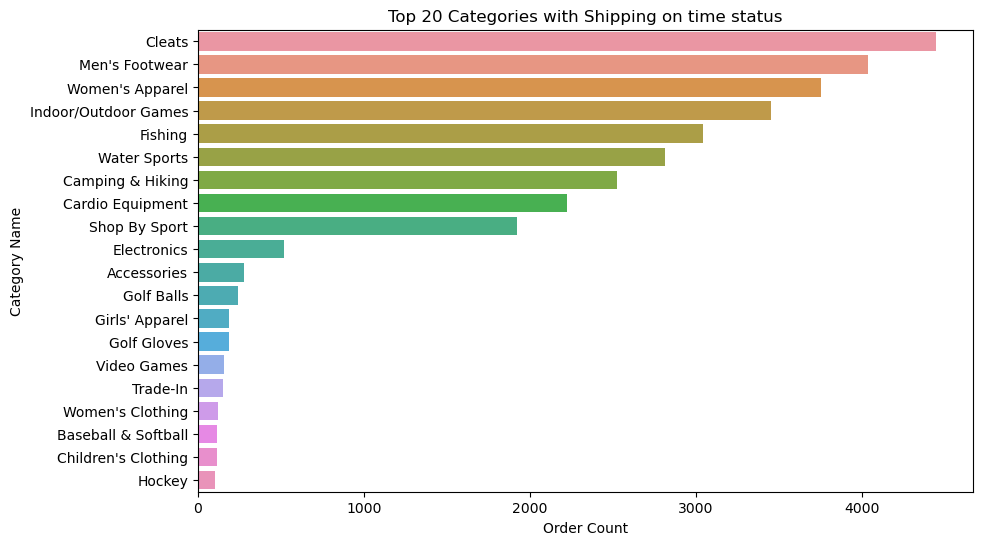

In [44]:
# Top 20 categories with Shipping on time Status

# Filtering columns with Shipping on time status
on_time = df2[(df2['Delivery Status'] == 'Shipping on time')]

#Top 20 categories with Shipping on time status
top_20_categories = on_time['Category Name'].value_counts().nlargest(20)

# Visualize the count of each category in the top 20 categories with Shipping on time status
plt.figure(figsize=(10,6))
sns.countplot(y="Category Name", data=on_time, order=top_20_categories.index)
plt.title('Top 20 Categories with Shipping on time status')
plt.xlabel('Order Count')
plt.ylabel('Category Name')
plt.show()

#### Observations: 
- Cleats,  Men's Footware, Women's Apparel, Indoor/Outdoor Games, Fishing are the top 5 categories with most orders, 
- hence the most late delivery and on time delivery are also among these categoires.

#### Insights:
- to run a sustainable business, on-time-delivery improvement should start from the top 10 sellers, that will bring an easy win

In [45]:
#check the shipping mode column:
df2['Shipping Mode'].value_counts()

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

In [46]:
#check the shipping mode types and the percentage:
Shipping_type=round(df2['Shipping Mode'].value_counts() /df2.shape[0]*100, 2)
Shipping_type

Standard Class    59.69
Second Class      19.51
First Class       15.41
Same Day           5.39
Name: Shipping Mode, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Standard Class'),
  Text(1, 0, 'First Class'),
  Text(2, 0, 'Second Class'),
  Text(3, 0, 'Same Day')])

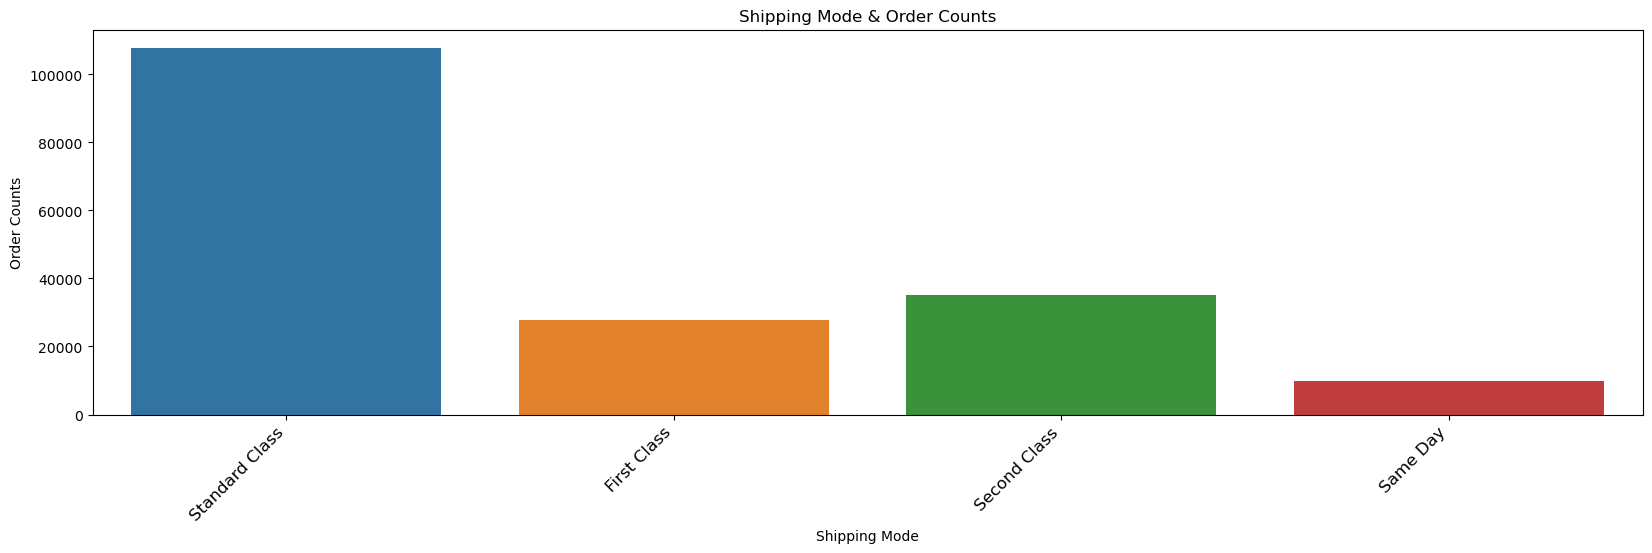

In [47]:
plt.figure(figsize=(20,5))
chart = sns.countplot(x="Shipping Mode",data=df2)
plt.xlabel('Shipping Mode')
plt.ylabel('Order Counts')
plt.title('Shipping Mode & Order Counts')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

#### Observation:
- 59.69% of the shipment are by standard class, total 107,752 orders, 3 times of the Second Class; that indicates that Standard Class is the most popular shipping Mode
- 19.51% shipment by Second Class, total orders: 35,216     
- 15.41% by First Class, total orders: 27,814
- only 5.39% by Same Day service, total orders: 9,737        

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Standard Class'),
  Text(1, 0, 'First Class'),
  Text(2, 0, 'Second Class'),
  Text(3, 0, 'Same Day')])

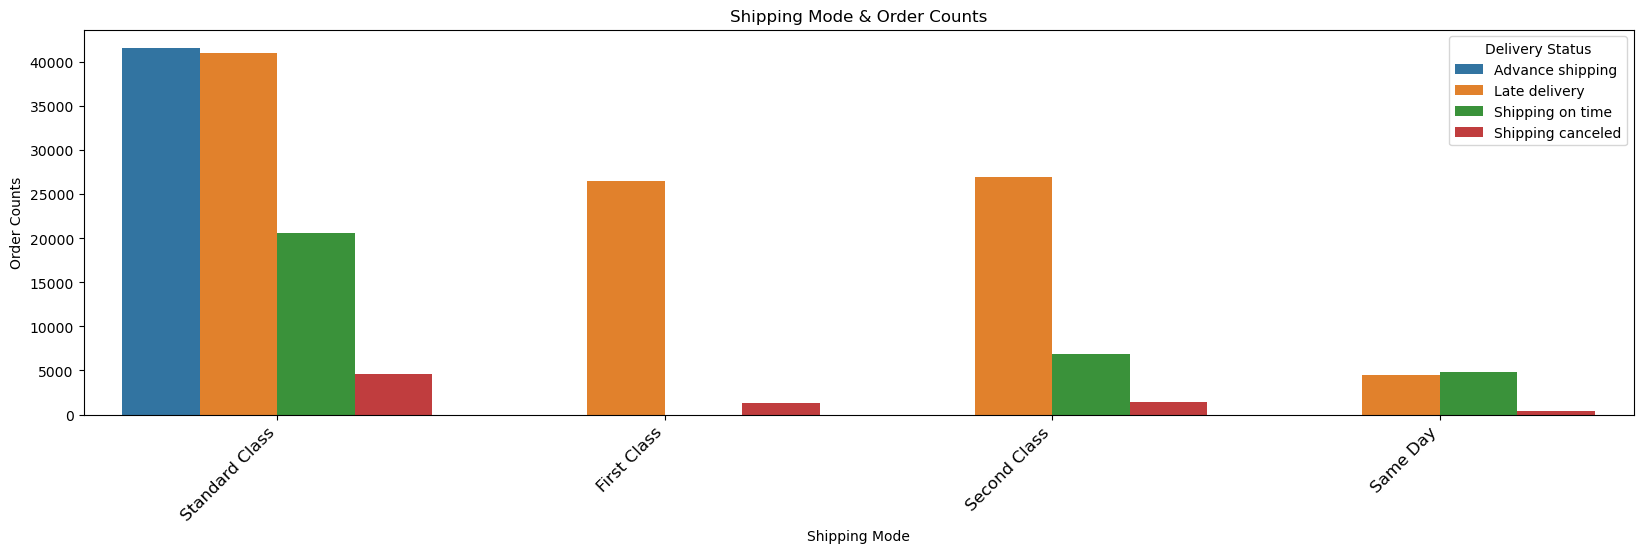

In [48]:
# plot and check the relationshipment between shipping mode and delivery status

plt.figure(figsize=(20,5))
chart = sns.countplot(x="Shipping Mode",hue='Delivery Status',data=df2)
plt.xlabel('Shipping Mode')
plt.ylabel('Order Counts')
plt.title('Shipping Mode & Order Counts')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

#### Observation:
- Only Standard Class generate early delivery
- Shipping on time not found from First Class, 
- First Class and Second Class appears have almost equal number of Late delivery
- Even Same Day service has last delivery


In [49]:
#check the order numbers by market
df2['Market'].value_counts()

LATAM           51594
Europe          50252
Pacific Asia    41260
USCA            25799
Africa          11614
Name: Market, dtype: int64

Text(0, 0.5, 'Count')

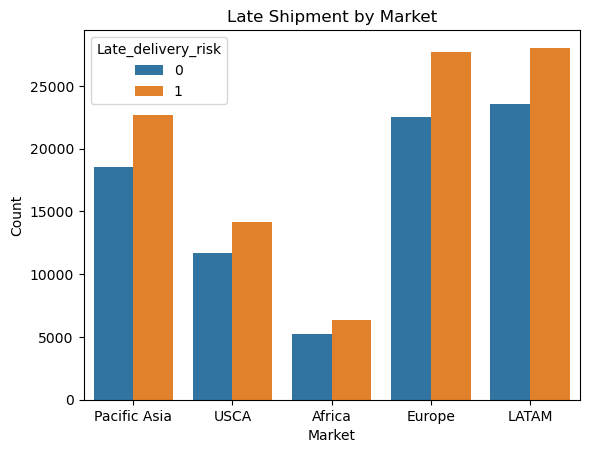

In [50]:
# To visual market VS late delivery: late delivery risk is found cross all markets 
sns.countplot(x='Market', hue='Late_delivery_risk', data=df2)
plt.title('Late Shipment by Market')
plt.xlabel('Market')
plt.ylabel('Count')

#### Oberservation:
- late delivery appears in every market
- the late delivery ratio appears to be a very similar percentage 

### Investigating the sales number by market and region

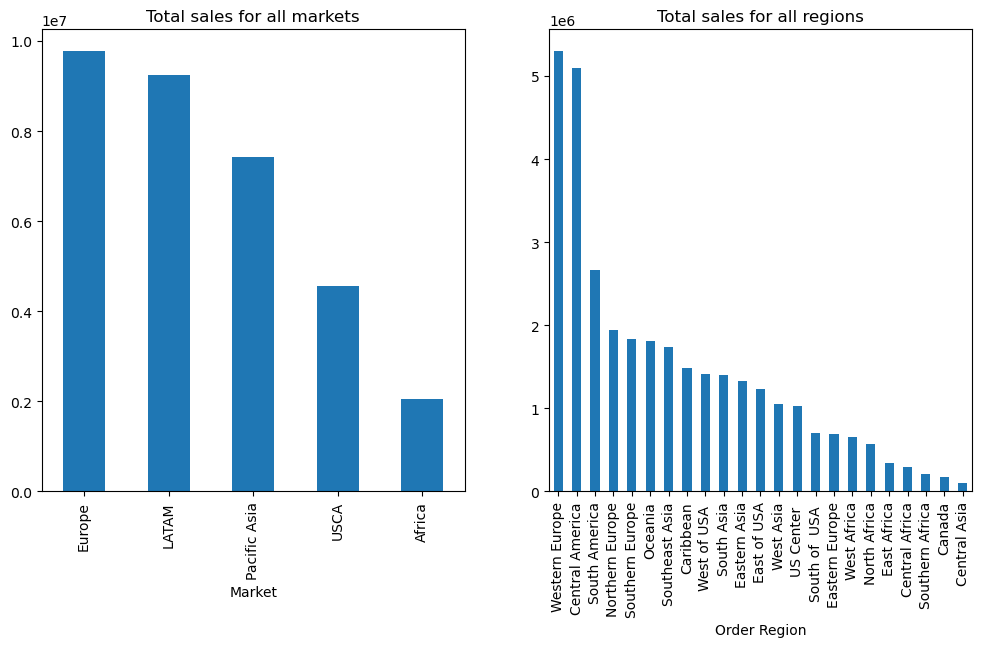

In [51]:
#Visualize the total sales by market and region

market = df2.groupby('Market') #Grouping by market
region = df2.groupby('Order Region')

plt.subplots(1, 2, figsize=(8, 6))
plt.subplot(1, 2, 1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")

plt.subplot(1, 2, 2)
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all regions")

plt.show()

#### Observations in terms of total sale:
- Europe, LATAM and Pacific Asia are the top 3 among 5 markets
- Region wise, Western Europe, Cental America and South America are the top 3,  regions, total sales from Western Europe is around 2 times of that from South America

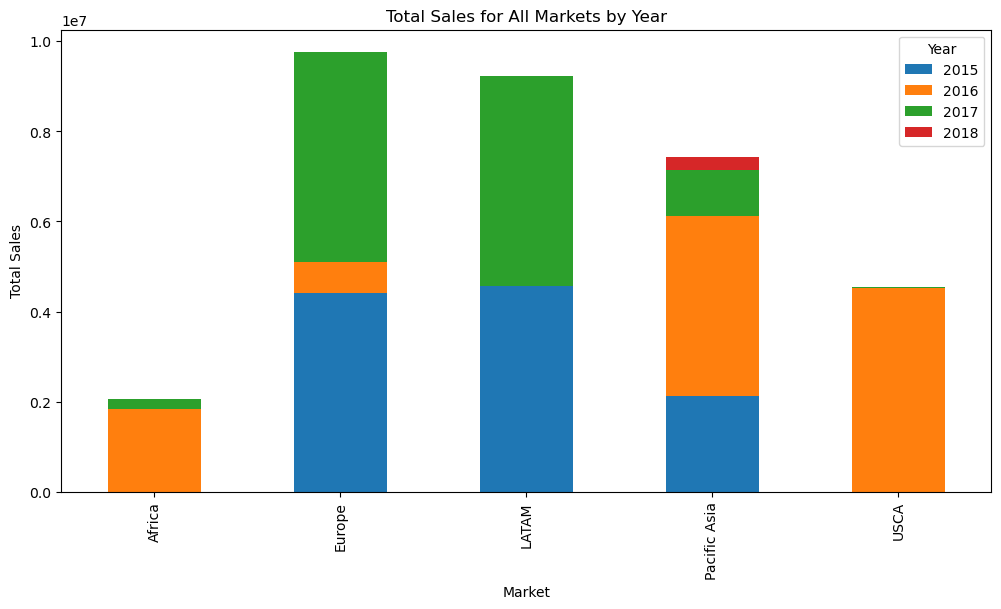

In [52]:
### Check the market sales growth

# Group by market and year
sales_pivot = pd.pivot_table(df2, index='Market', columns='Order_year', values='Sales per customer', aggfunc='sum')

# Create stacked bar chart
sales_pivot.plot(kind='bar', stacked=True, figsize=(12,6), title='Total Sales for All Markets by Year')

# Set labels and legend
plt.xlabel('Market')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

#### Observations:
- for 2018, the dataset only have records of Pacific Asia, so we won't compare yearly trend for every market
- In 2016 Pacific Asia, Africa and USCA market doing better than 2017.
- in 2017, Europe and LATAM market performance better than the rest 


In [53]:
#check shipping month column:
df2['Shipping_month'].value_counts()

1     17404
7     15954
3     15886
5     15843
8     15789
9     15539
4     15451
6     15282
2     14831
10    13293
12    12771
11    12476
Name: Shipping_month, dtype: int64

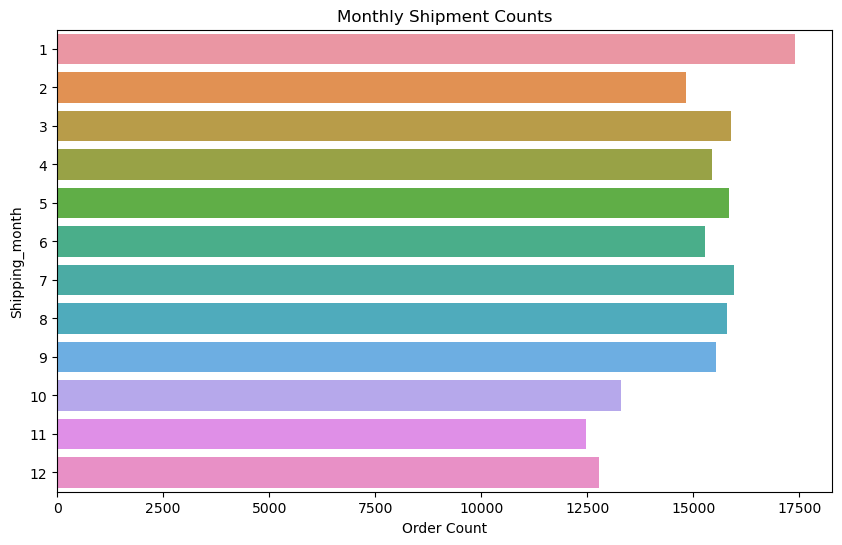

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(y="Shipping_month", data=df2)
plt.title('Monthly Shipment Counts')
plt.xlabel('Order Count')
plt.ylabel('Shipping_month')
plt.show()

#### Observation
- Nov and Dec are slow shipping season with least deliveries, followed by Oct and Feb.
- Jan is the busiest time for shipping with 17404 deliveries followed by steady July, March, May,Aug, Sep and the rest months of the year.

In [55]:
#Explore the relationship between Shipping_month and late_delivery.

# calculate the sum of monthly late delivery
late_shipment_monthly=df2.groupby('Shipping_month')['late_delivery'].sum()

late_shipment_monthly

Shipping_month
1     9420
2     8127
3     8819
4     8352
5     8694
6     8384
7     8669
8     8720
9     8631
10    7300
11    6788
12    7073
Name: late_delivery, dtype: int64

In [56]:
#stored the filter data into a new df 'late_shipment_monthly_tab1'
late_shipment_monthly_tab1=late_shipment_monthly.reset_index().rename_axis(None, axis=1)
late_shipment_monthly_tab1

Shipping_month  late_delivery
0                1           9420
1                2           8127
2                3           8819
3                4           8352
4                5           8694
5                6           8384
6                7           8669
7                8           8720
8                9           8631
9               10           7300
10              11           6788
11              12           7073

In [57]:
# Jan ratio of late shipment
9420/17404

0.5412548839347276

In [58]:
# Nov ratio of late shipment
6788/12476

0.5440846425136262

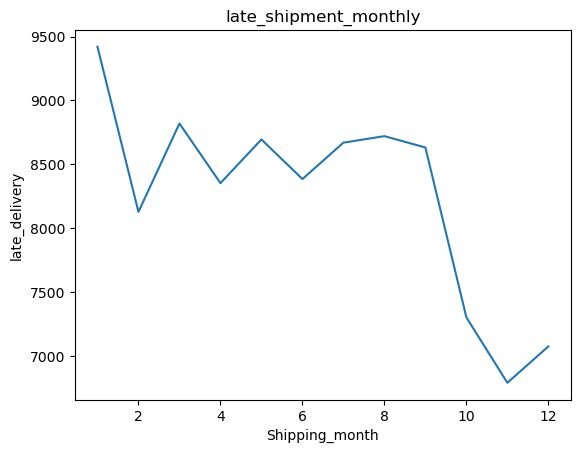

In [59]:
sns.lineplot(x='Shipping_month', y='late_delivery',data = late_shipment_monthly_tab1)
plt.ylabel('late_delivery')
plt.title('late_shipment_monthly')
plt.show()

### Observation:
- Jan ranks No. 1 month with 17404 shipment, at the same time, also have most late delivery in this month: 9420, ratio of late shipment: 54.1%
- this indicates the late shipment is positively related to number of shipment: more shipment more late delivery
- vise versa: Nov has lowest shipment number: 12476, and lowest late shipment number:6788, ratio of late shipment: 54.4%   
- it indicate that the late shipment happens year around at a similar ratio

In [60]:
## the shipment number is going down from in 2017, the data for year 2018 are not fully recorded
df2['Shipping_year'].value_counts()

2016    62602
2015    62002
2017    53546
2018     2369
Name: Shipping_year, dtype: int64

In [61]:
#Explore the relationship between Shipping_year and late_delivery.

# calculate the sum of yearly late delivery
late_shipment_yearly=df2.groupby('Shipping_year')['late_delivery'].sum()

late_shipment_yearly

Shipping_year
2015    33940
2016    34514
2017    29178
2018     1345
Name: late_delivery, dtype: int64

In [62]:
#stored the filter data into a new df 'late_shipment_yearly_tab1'
late_shipment_yearly_tab1=late_shipment_yearly.reset_index().rename_axis(None, axis=1)
late_shipment_yearly_tab1

Shipping_year  late_delivery
0           2015          33940
1           2016          34514
2           2017          29178
3           2018           1345

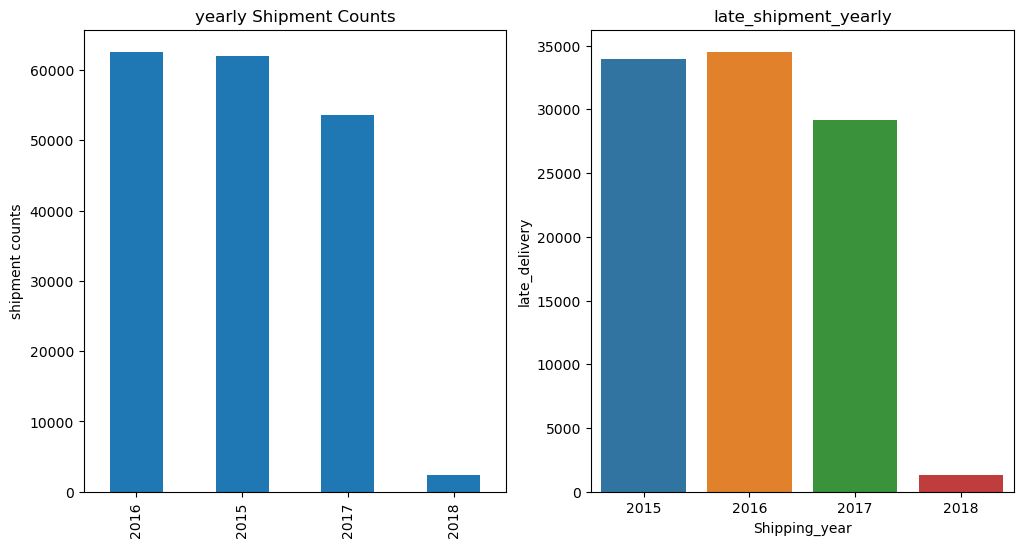

In [63]:
#Visualize the total yearly shipment and yearly late shipment

plt.subplots(1, 2, figsize=(8, 6))
plt.subplot(1, 2, 1)
df2['Shipping_year'].value_counts().plot.bar(figsize=(12,6), title="yearly Shipment Counts")
plt.ylabel('shipment counts')

plt.subplot(1, 2, 2)
sns.barplot(x='Shipping_year', y='late_delivery',data = late_shipment_yearly_tab1)
plt.ylabel('late_delivery')
plt.title('late_shipment_yearly')

plt.show()

#### Observation:
- order numbers slightly going up from 2015 to 2016,then took a down turn in 2017
- 2018 order numbers are not fully recorded
- latel delivery follows the same pattern of the yearly order numbers:on-time-delivery not improved in that period of time.

In [64]:
#Checking Order Item Total: Majority orders are  less than ~$200.
df['Order Item Total'].value_counts()

122.839996    1264
109.190002    1247
124.790001    1243
129.990005    1243
116.989998    1243
              ... 
455.950012       1
470.250000       1
424.790008       1
98.010002        1
474.760010       1
Name: Order Item Total, Length: 2927, dtype: int64

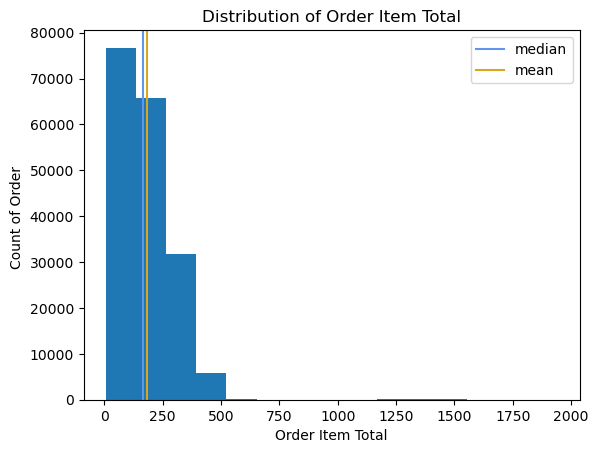

In [65]:
# EDA and visualize the Order Item Total column to inform our decision
plt.figure()
plt.hist(df['Order Item Total'], bins=15)
plt.xlabel('Order Item Total')
plt.ylabel('Count of Order ')
plt.title('Distribution of Order Item Total')
plt.axvline(df['Order Item Total'].median(), label='median', color='cornflowerblue')
plt.axvline(df['Order Item Total'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

#### Observation:

- the Order Item Total distribution is right skewed, most order-totals are between 0~200.
- average and median of order total item total is around 200
- as outliers,very few orders with total over 1000

In [66]:
#Checking Order Item Total: Majority orders have 1 item, average 2 items, max. 5 items

df['Order Item Quantity'].value_counts()

1    99134
5    20385
3    20350
4    20335
2    20315
Name: Order Item Quantity, dtype: int64

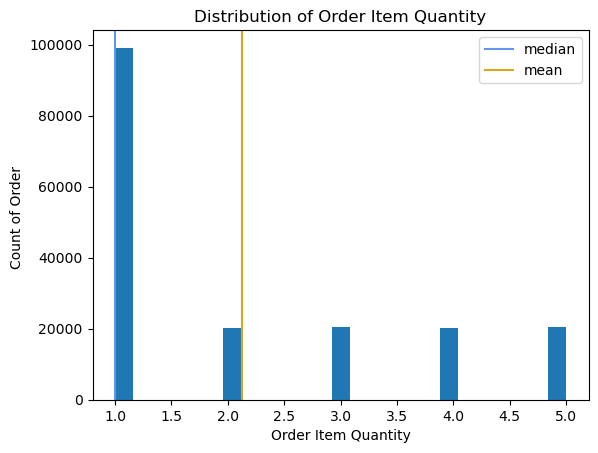

In [67]:
# EDA and visualize the Order Item Quantity column to inform our decision
plt.figure()
plt.hist(df['Order Item Quantity'], bins=25)
plt.xlabel('Order Item Quantity')
plt.ylabel('Count of Order ')
plt.title('Distribution of Order Item Quantity')


plt.axvline(df['Order Item Quantity'].median(), label='median', color='cornflowerblue')
plt.axvline(df['Order Item Quantity'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

#### Observation:
- the Order Item Quantity distribution is right skewed, 
- average 2 items, and majority orders with 1 item; 
- max. 5 items.

In [68]:
# The enumerate function returns a counter alongside our data:
list(enumerate(df2.columns, start=1))

[(1, 'Type'),
 (2, 'Days for shipping (real)'),
 (3, 'Days for shipment (scheduled)'),
 (4, 'Benefit per order'),
 (5, 'Sales per customer'),
 (6, 'Delivery Status'),
 (7, 'Late_delivery_risk'),
 (8, 'Category Id'),
 (9, 'Category Name'),
 (10, 'Customer City'),
 (11, 'Customer Country'),
 (12, 'Customer Email'),
 (13, 'Customer Fname'),
 (14, 'Customer Id'),
 (15, 'Customer Lname'),
 (16, 'Customer Password'),
 (17, 'Customer Segment'),
 (18, 'Customer State'),
 (19, 'Customer Street'),
 (20, 'Customer Zipcode'),
 (21, 'Department Id'),
 (22, 'Department Name'),
 (23, 'Latitude'),
 (24, 'Longitude'),
 (25, 'Market'),
 (26, 'Order City'),
 (27, 'Order Country'),
 (28, 'Order Customer Id'),
 (29, 'Order Id'),
 (30, 'Order Item Cardprod Id'),
 (31, 'Order Item Discount'),
 (32, 'Order Item Discount Rate'),
 (33, 'Order Item Id'),
 (34, 'Order Item Product Price'),
 (35, 'Order Item Profit Ratio'),
 (36, 'Order Item Quantity'),
 (37, 'Sales'),
 (38, 'Order Item Total'),
 (39, 'Order Profi

### Data Cleaning.

### Step 2: Check for duplicated rows

In [69]:
# How many rows are duplicated
df2.duplicated().sum()

0

There is no duplicated rows, that's good.

In [70]:
# check if any Columns are duplicated  
print(f'Duplicated columns: {df2.T.duplicated().any()}')

Duplicated columns: True


In [71]:
df2[df2.duplicated()]

Empty DataFrame
Columns: [Type, Days for shipping (real), Days for shipment (scheduled), Benefit per order, Sales per customer, Delivery Status, Late_delivery_risk, Category Id, Category Name, Customer City, Customer Country, Customer Email, Customer Fname, Customer Id, Customer Lname, Customer Password, Customer Segment, Customer State, Customer Street, Customer Zipcode, Department Id, Department Name, Latitude, Longitude, Market, Order City, Order Country, Order Customer Id, Order Id, Order Item Cardprod Id, Order Item Discount, Order Item Discount Rate, Order Item Id, Order Item Product Price, Order Item Profit Ratio, Order Item Quantity, Sales, Order Item Total, Order Profit Per Order, Order Region, Order State, Order Status, Order Zipcode, Product Card Id, Product Category Id, Product Description, Product Image, Product Name, Product Price, Product Status, Shipping Mode, Order_year, Order_month, Order_day, Shipping_year, Shipping_month, Shipping_day, late_delivery]
Index: []

[0 rows x 58 columns]

#### - Will handle and remove duplicate/redundant columns at Step 4

### Step 3: Dealing with missing values

In [72]:
# check missing values for each column
df2.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [73]:
# Look at the percentages of missing values
df2.isna().sum()/df2.shape[0] * 100.0

Type                               0.000000
Days for shipping (real)           0.000000
Days for shipment (scheduled)      0.000000
Benefit per order                  0.000000
Sales per customer                 0.000000
Delivery Status                    0.000000
Late_delivery_risk                 0.000000
Category Id                        0.000000
Category Name                      0.000000
Customer City                      0.000000
Customer Country                   0.000000
Customer Email                     0.000000
Customer Fname                     0.000000
Customer Id                        0.000000
Customer Lname                     0.004432
Customer Password                  0.000000
Customer Segment                   0.000000
Customer State                     0.000000
Customer Street                    0.000000
Customer Zipcode                   0.001662
Department Id                      0.000000
Department Name                    0.000000
Latitude                        

- Based on the above, it appears that ~86%  of `Order Zipcode` are missing, will look into further cause zip code is very critical  to accuracy and on-time delivery process. 
- Product Description 100% missing, we are going to use prouct ID as feature variable later.
- Customer Lname: 8 missing, we are going to use customer ID as feature variable later.
- Customer Zipcode: 3 are missing. will fill up. 

In [74]:
#Fill 'Customer Zipcode' 3 missing values with zero
#Since only missing 3 zip codes which are not very important, therefore replaced with 0.

df2['Customer Zipcode']=df2['Customer Zipcode'].fillna(0)

In [75]:
# check length of Order Zipcode, if there is  patern with Order Zipcode: no pattern
df2['Order Zipcode'].value_counts()

10035.0    648
10009.0    550
10024.0    541
94122.0    526
10011.0    463
          ... 
63376.0      1
31088.0      1
32174.0      1
60477.0      1
61832.0      1
Name: Order Zipcode, Length: 609, dtype: int64

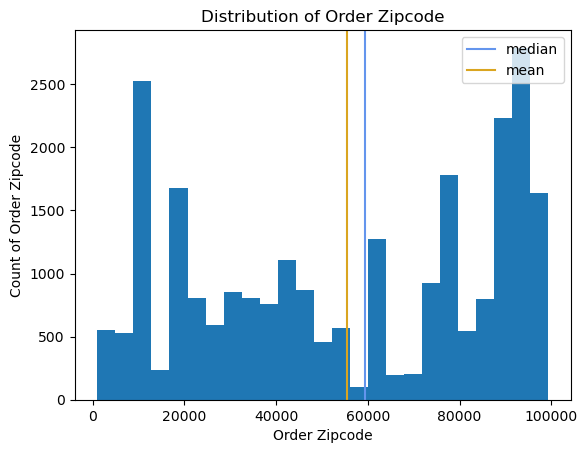

In [76]:
# Let's do a little EDA and visualize the Order Zipcode column to inform our decision
plt.figure()
plt.hist(df2['Order Zipcode'], bins=25)
plt.xlabel('Order Zipcode')
plt.ylabel('Count of Order Zipcode')
plt.title('Distribution of Order Zipcode')
plt.axvline(df2['Order Zipcode'].median(), label='median', color='cornflowerblue')
plt.axvline(df2['Order Zipcode'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

#### Observation:
- order zip code stretch from 0 to 100000
- most shipment are clusted at some zip zones
- least shipment found between zipcode 55000 to 60000

In [77]:
#check the rows with Zipcode to see if any clues or patterns
grouped = df2[df2['Order Zipcode'] != ''].groupby(['Order Zipcode', 'late_delivery']).size()
print(grouped)

Order Zipcode  late_delivery
1040.0         0                 3
1453.0         0                 3
               1                14
1752.0         1                 6
1810.0         0                 3
                                ..
98661.0        1                 9
99207.0        0                 6
               1                16
99301.0        0                 1
               1                 9
Length: 1051, dtype: int64


In [78]:
# Drop Order Zipcode:
# Except for destination city, country and region, there is no destination address column to locate the order destination zipcode. 
#Even though zip code is important to the delivery process and accuracy, with over 86% missing value, unfortunately, this column has to be dropped. 

df3=df2.drop(columns=['Order Zipcode'], axis=1)
df3.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   

  Product Price Product Status   Shipping Mode  Order_year Order_month  \
0        327.75              0  Standard Class        2018           1   
1        327.75              0  Standard Class        2018           1   
2        327.75              0  Standard Class        2018           1   
3        327.75              0  Standard Class        2018           1   
4        327.75              0  Standard Class        2018           1   

  Order_day Shipping_year Shipping_month Shipping_day  late_delivery  
0        31          2018              2            3              0  
1        13          2018              1           18              1  
2        13          2018              1           17              0  
3        13          2018              1           16              0  
4        13          2018              1           15              0  

[5 rows x 57 columns]

### Exploring Correlations
A key part of the regression modelling process is to explore correlations (not only between the independent and dependent variables, but also between dependent variables). 

Correlation gives us an understanding of how our variables vary with respect to another. Investigating the correlations can allow us to also see which features are likely to be the most impactful on our dependent variable.
Handling Correlation, Multicollinearity

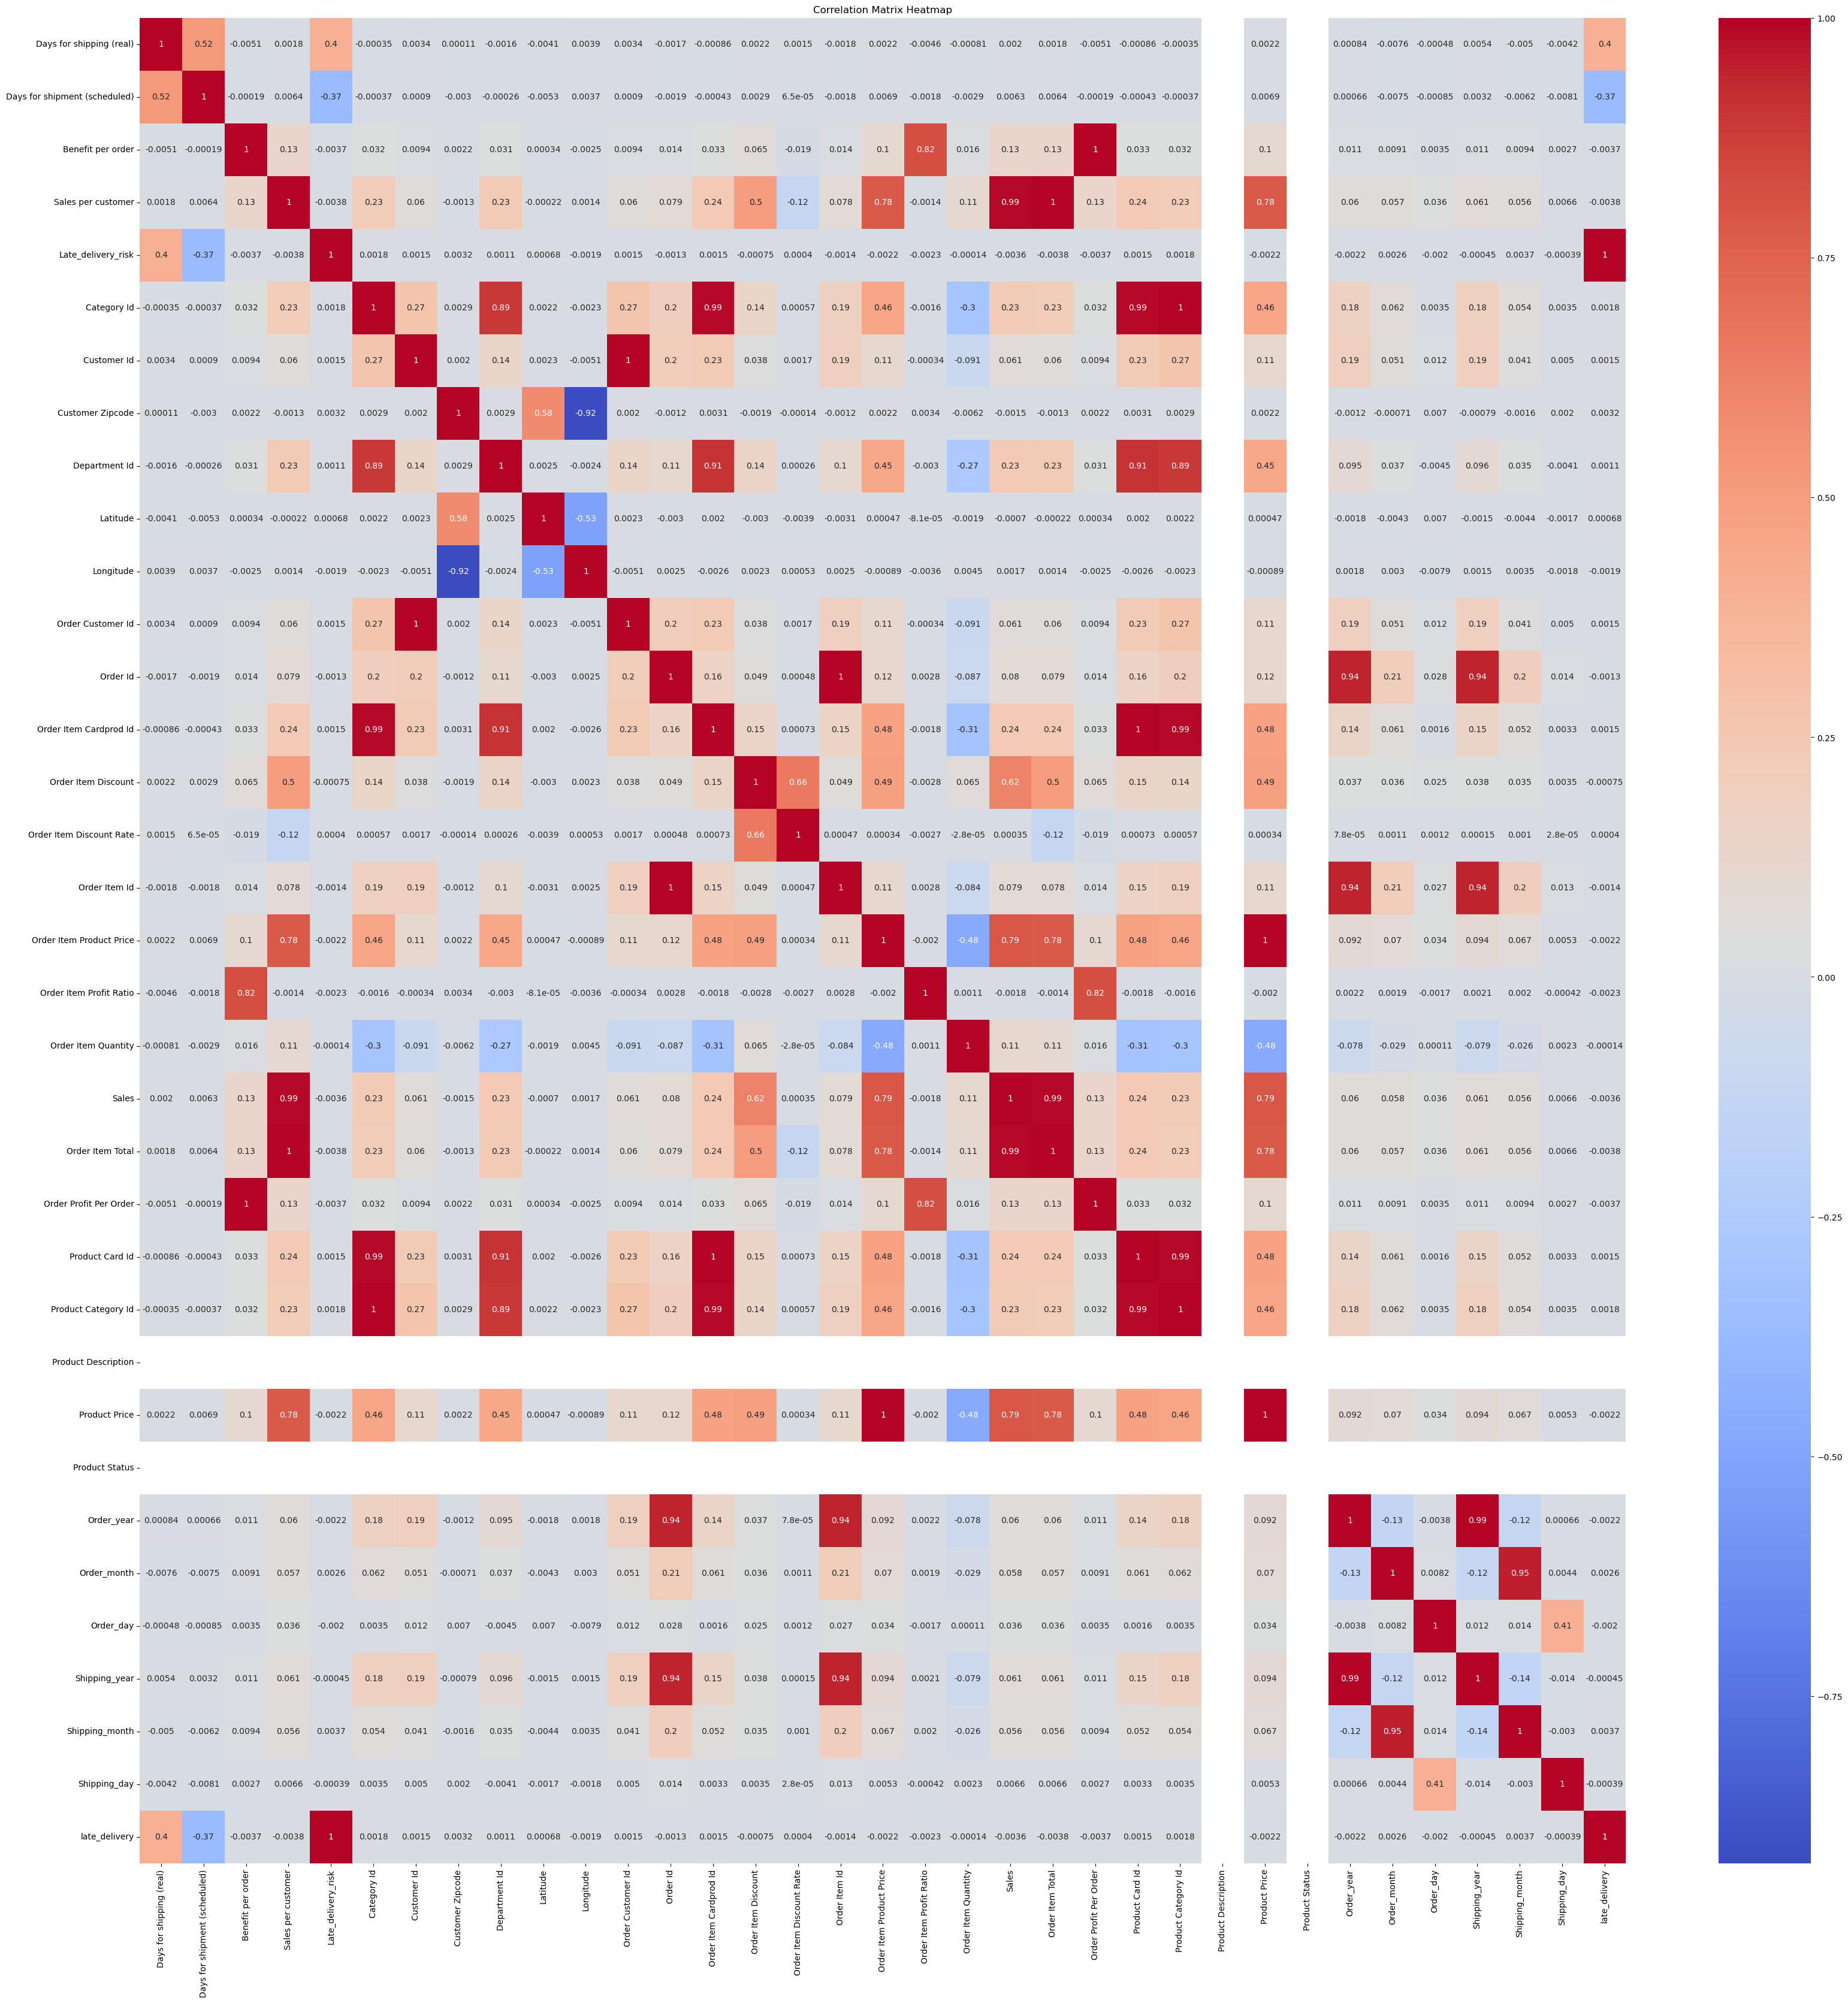

In [79]:
# Check the Correlation, Multicollinearity by heatmap

corr_matrix = df3.corr()

# create a heatmap using seaborn
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Observation:
- obverously there are some null value (such as Product Description) and duplicate columns such as late_delivery
- shipping year,month and day are highly correlated to order year,month, day

#### Drop null value, irrelevant and duplicate columns: 
- Product Description (all blanks),Product Image(web links), Product Status(the only value: 0), 
- Department Id (keep deparment name), 
- Customer Password & Customer Email (sensive and black out), 
- Category Id ( keep category name)
- late_delivery, highly correlated to late_delivery_risk

In [80]:
# drop Shipping_year, Shipping_month, Shipping_day columns.
df3.drop(columns=['Shipping_year', 'Shipping_month', 'Shipping_day'], axis=1,inplace=True)
df3.shape

(180519, 54)

In [81]:
# drop irrelevant and duplicate columns: 
# Product Description (all blanks),Product Image(web links), Product Status(the only value: 0), Department Id (keep deparment name), Customer Password & Customer Email (sensive and black out), Category Id ( keep category name)
df3.drop(columns=['Product Description', 'Product Image', 'Product Status', 'Department Id', 'Customer Password', 'Customer Email', 'Category Id', 'late_delivery'], axis=1,inplace=True)
df3.head(5)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods        Caguas      Puerto Rico  ...   
2                   0  Sporting Goods      San Jose          EE. UU.  ...   
3                   0  Sporting Goods   Los Angeles          EE. UU.  ...   
4                   0  Sporting Goods        Caguas      Puerto Rico  ...   

       Order State     Order Status Product Card Id Product Category Id  \
0  Java Occidental         COMPLETE            1360                  73   
1         Rajastán          PENDING            1360                  73   
2         Rajastán           CLOSED            1360                  73   
3       Queensland         COMPLETE            1360                  73   
4       Queensland  PENDING_PAYMENT            1360                  73   

   Product Name Product Price   Shipping Mode Order_year  Order_month  \
0  Smart watch         327.75  Standard Class       2018            1   
1  Smart watch         327.75  Standard Class       2018            1   
2  Smart watch         327.75  Standard Class       2018            1   
3  Smart watch         327.75  Standard Class       2018            1   
4  Smart watch         327.75  Standard Class       2018            1   

   Order_day  
0         31  
1         13  
2         13  
3         13  
4         13  

[5 rows x 46 columns]

In [82]:
df3.shape

(180519, 46)

In [83]:
# to show all the columns, which will help to undertand data better
pd.set_option('display.max_columns', None)

#### Step 4 Check and  Remove duplicate or redundant columns
At this point, we can see that some columns have same values, there are still 47 columns, I'll define a function to check which columns have 100% same values then remove redundant columns

In [84]:
from itertools import combinations

def check_redundancies(df):
    
    redundancy_list = []
    
    for i in list(combinations(df.columns, 2)):
        
        if all(df[i[0]] == df[i[1]]):
            redundancy_list.append(i)
            print("{} and {} are the same".format(*i))
    
    return redundancy_list
                
redundancies = check_redundancies(df3)

Benefit per order and Order Profit Per Order are the same
Sales per customer and Order Item Total are the same
Customer Id and Order Customer Id are the same
Order Item Cardprod Id and Product Card Id are the same
Order Item Product Price and Product Price are the same


   #### Other redundant columns to drop together
   
   - 'Customer Id', 'Customer Fname', 'Customer Lname' are redundant, we keep 'Customer Id' 
   - Sales = Order Item Quantity * Product Price, Order Item Total, they are correlated or overlap, so we drop 'Sales','Order Item Total', 
   - 'Order Item Discount' and	'Order Item Discount Rate' are correlated, we drop 'Order Item Discount Rate'

In [85]:
df4=df3.drop(['Customer Fname', 'Customer Lname', 'Sales','Order Item Total', 'Order Item Discount Rate', 'Benefit per order','Order Customer Id', 'Order Item Cardprod Id','Order Item Product Price' ],axis=1)

In [86]:
df4.head(5)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Sales per customer   Delivery Status  Late_delivery_risk   Category Name  \
0          314.640015  Advance shipping                   0  Sporting Goods   
1          311.359985     Late delivery                   1  Sporting Goods   
2          309.720001  Shipping on time                   0  Sporting Goods   
3          304.809998  Advance shipping                   0  Sporting Goods   
4          298.250000  Advance shipping                   0  Sporting Goods   

  Customer City Customer Country  Customer Id Customer Segment Customer State  \
0        Caguas      Puerto Rico        20755         Consumer             PR   
1        Caguas      Puerto Rico        19492         Consumer             PR   
2      San Jose          EE. UU.        19491         Consumer             CA   
3   Los Angeles          EE. UU.        19490      Home Office             CA   
4        Caguas      Puerto Rico        19489        Corporate             PR   

            Customer Street  Customer Zipcode Department Name   Latitude  \
0  5365 Noble Nectar Island             725.0         Fitness  18.251453   
1          2679 Rustic Loop             725.0         Fitness  18.279451   
2      8510 Round Bear Gate           95125.0         Fitness  37.292233   
3           3200 Amber Bend           90027.0         Fitness  34.125946   
4  8671 Iron Anchor Corners             725.0         Fitness  18.253769   

    Longitude        Market  Order City Order Country  Order Id  \
0  -66.037056  Pacific Asia      Bekasi     Indonesia     77202   
1  -66.037064  Pacific Asia     Bikaner         India     75939   
2 -121.881279  Pacific Asia     Bikaner         India     75938   
3 -118.291016  Pacific Asia  Townsville     Australia     75937   
4  -66.037048  Pacific Asia  Townsville     Australia     75936   

   Order Item Discount  Order Item Id  Order Item Profit Ratio  \
0            13.110000         180517                     0.29   
1            16.389999         179254                    -0.80   
2            18.030001         179253                    -0.80   
3            22.940001         179252                     0.08   
4            29.500000         179251                     0.45   

   Order Item Quantity  Order Profit Per Order    Order Region  \
0                    1               91.250000  Southeast Asia   
1                    1             -249.089996      South Asia   
2                    1             -247.779999      South Asia   
3                    1               22.860001         Oceania   
4                    1              134.210007         Oceania   

       Order State     Order Status  Product Card Id  Product Category Id  \
0  Java Occidental         COMPLETE             1360                   73   
1         Rajastán          PENDING             1360                   73   
2         Rajastán           CLOSED             1360                   73   
3       Queensland         COMPLETE             1360                   73   
4       Queensland  PENDING_PAYMENT             1360                   73   

   Product Name  Product Price   Shipping Mode  Order_year  Order_month  \
0  Smart watch          327.75  Standard Class        2018            1   
1  Smart watch          327.75  Standard Class        2018            1   
2  Smart watch          327.75  Standard Class        2018            1   
3  Smart watch          327.75  Standard Class        2018            1   
4  Smart watch          327.75  Standard Class        2018            1   

   Order_day  
0         31  
1         13  

In [87]:
#sanity check
df4.shape

(180519, 37)

In [88]:
# Check the correlation matrix of the numerical columns
corr_matrix = df4.corr()
print(corr_matrix)

                               Days for shipping (real)  \
Days for shipping (real)                       1.000000   
Days for shipment (scheduled)                  0.515880   
Sales per customer                             0.001757   
Late_delivery_risk                             0.401415   
Customer Id                                    0.003432   
Customer Zipcode                               0.000114   
Latitude                                      -0.004073   
Longitude                                      0.003911   
Order Id                                      -0.001711   
Order Item Discount                            0.002231   
Order Item Id                                 -0.001769   
Order Item Profit Ratio                       -0.004638   
Order Item Quantity                           -0.000811   
Order Profit Per Order                        -0.005101   
Product Card Id                               -0.000859   
Product Category Id                           -0.000348 

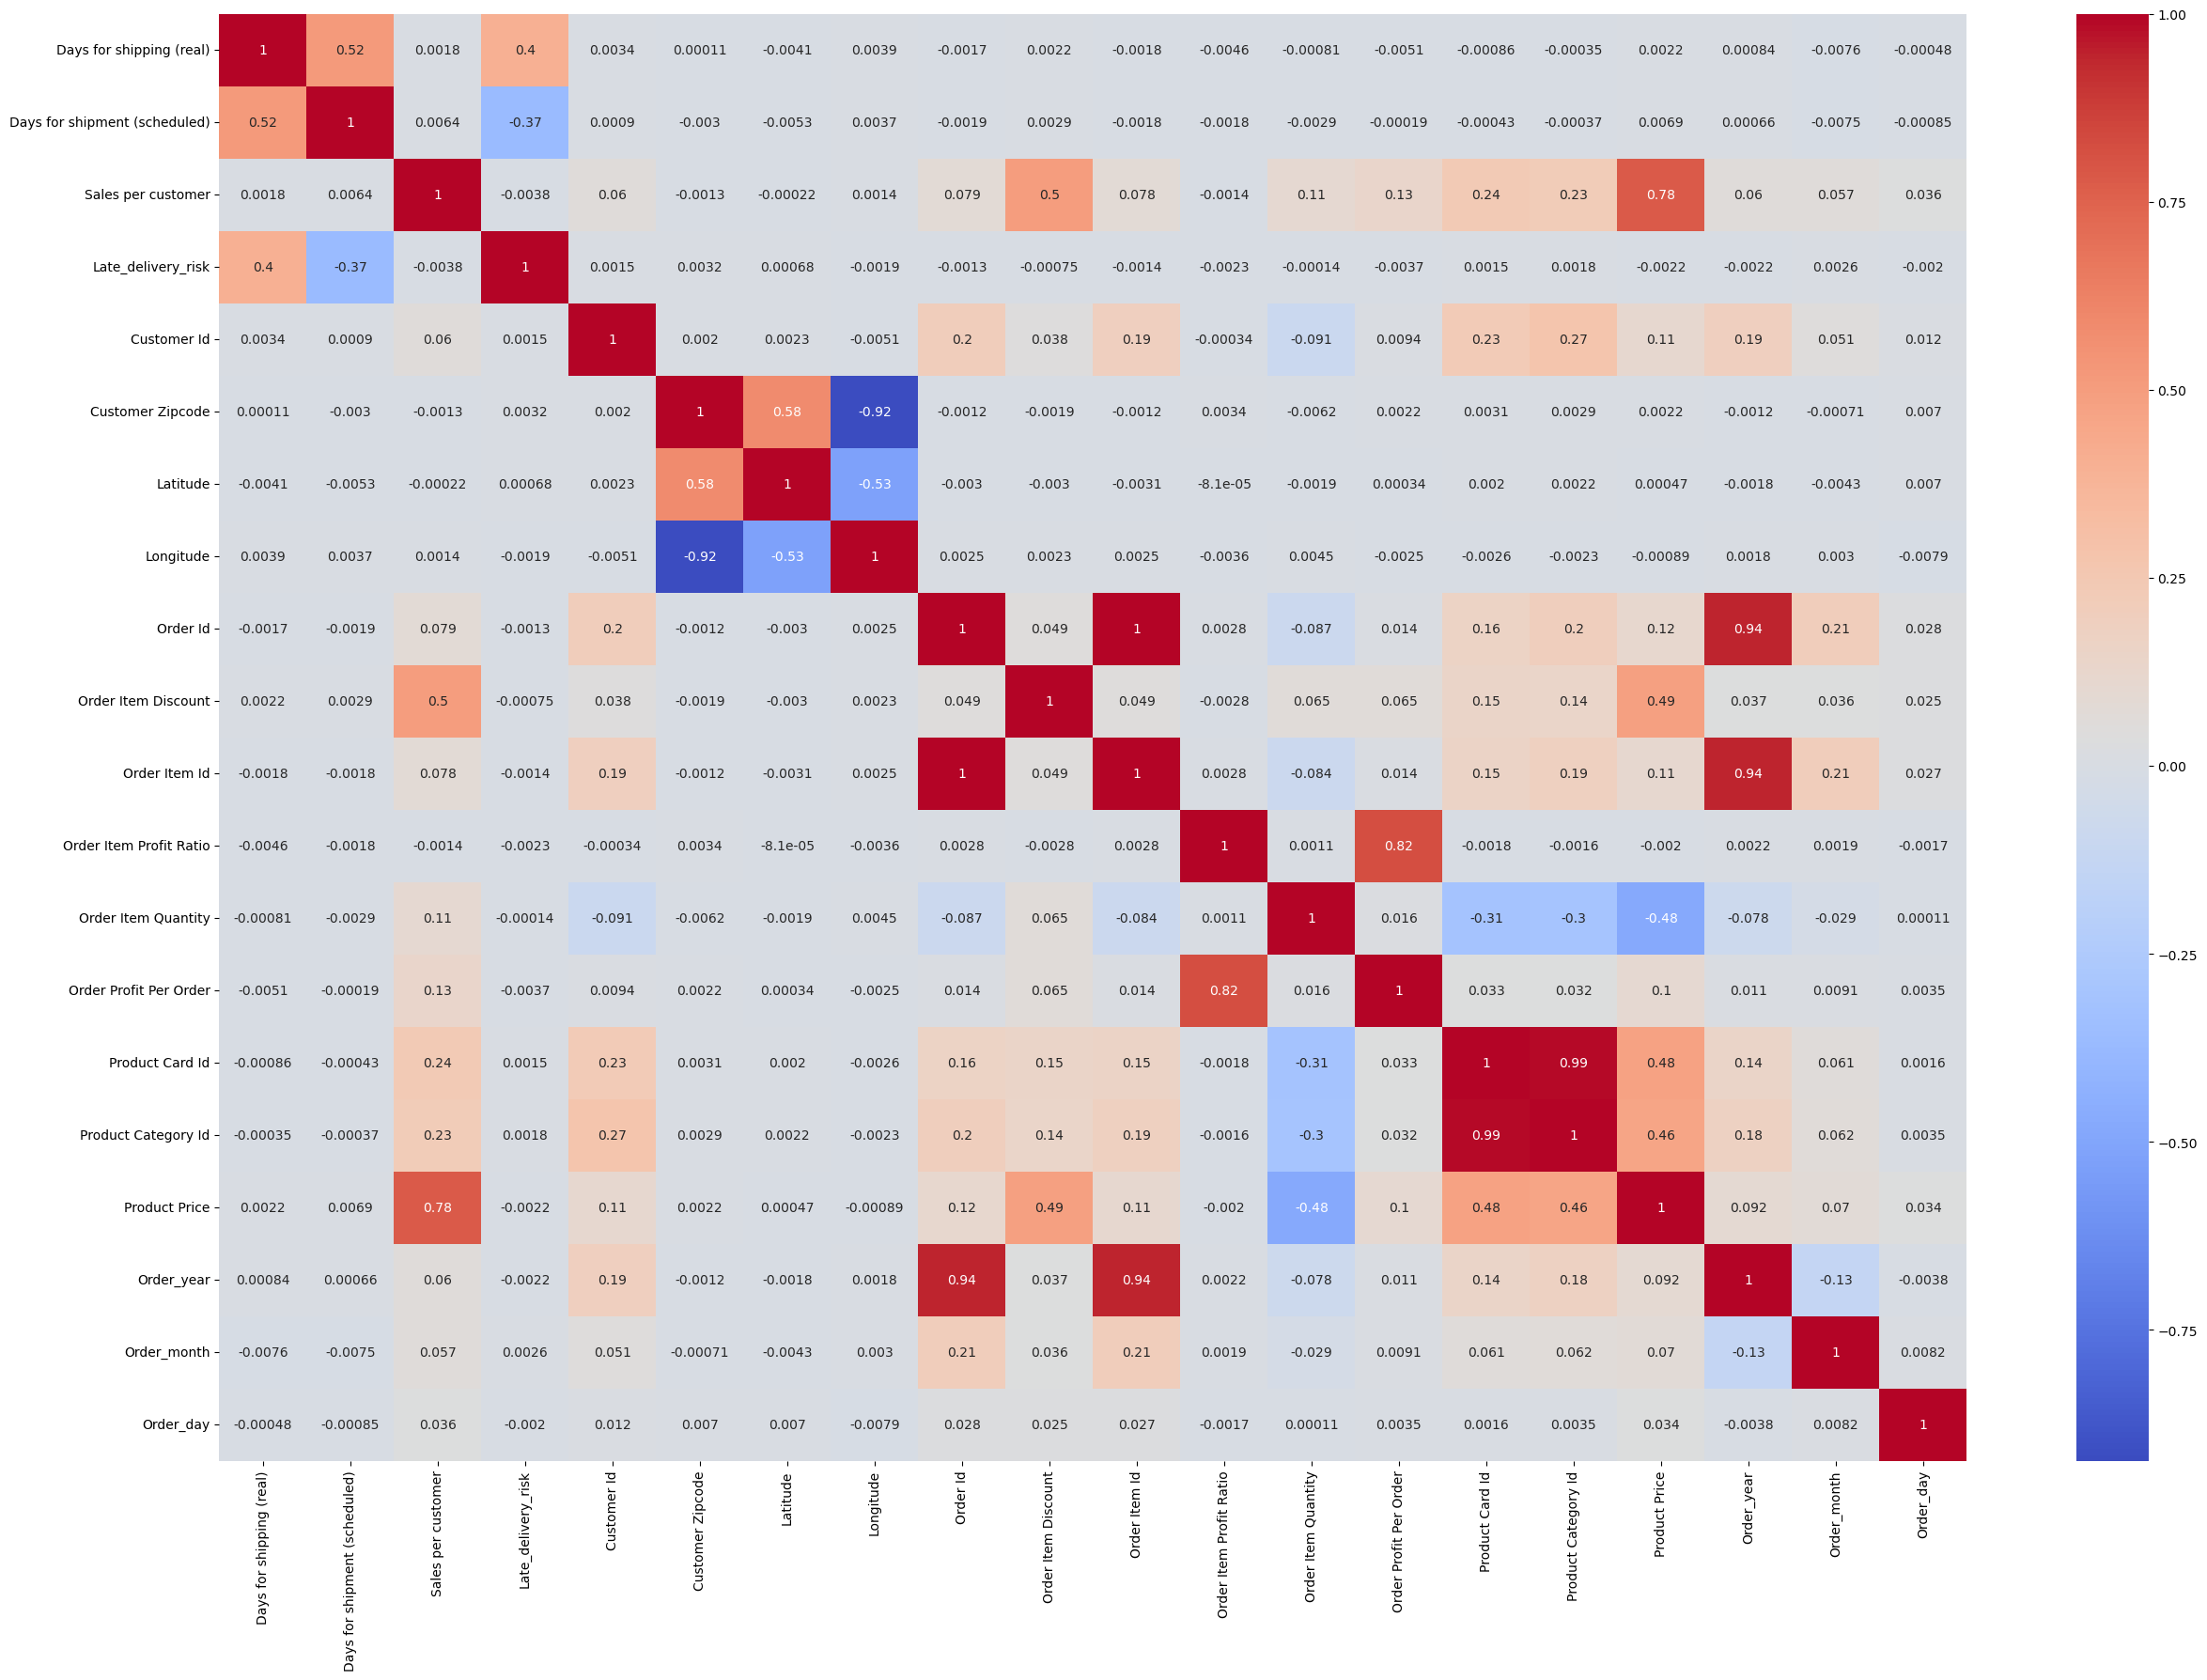

In [89]:
corrmap = df4.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(df4[top].corr(),annot=True,cmap='coolwarm')

Based on heatmap, to drop following columns (on the left) which have high correlation with the columns on the very right (to keep):

    - 1: 'Sales per customer' with Procuct price (0.78), but I'll keep both for the convenience of financial report 
    -2. 'Customer Zipcode' with Latitude
    -3. 'Order Item Id' with  Order Id
    -4. 'Order Item Profit Ratio' with Order Profit Per Order

In [90]:
df5=df4.drop(['Customer Zipcode', 'Order Item Id', 'Order Item Profit Ratio' ], axis=1)

In [91]:
df5.head(2)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   

   Sales per customer   Delivery Status  Late_delivery_risk   Category Name  \
0          314.640015  Advance shipping                   0  Sporting Goods   
1          311.359985     Late delivery                   1  Sporting Goods   

  Customer City Customer Country  Customer Id Customer Segment Customer State  \
0        Caguas      Puerto Rico        20755         Consumer             PR   
1        Caguas      Puerto Rico        19492         Consumer             PR   

            Customer Street Department Name   Latitude  Longitude  \
0  5365 Noble Nectar Island         Fitness  18.251453 -66.037056   
1          2679 Rustic Loop         Fitness  18.279451 -66.037064   

         Market Order City Order Country  Order Id  Order Item Discount  \
0  Pacific Asia     Bekasi     Indonesia     77202            13.110000   
1  Pacific Asia    Bikaner         India     75939            16.389999   

   Order Item Quantity  Order Profit Per Order    Order Region  \
0                    1               91.250000  Southeast Asia   
1                    1             -249.089996      South Asia   

       Order State Order Status  Product Card Id  Product Category Id  \
0  Java Occidental     COMPLETE             1360                   73   
1         Rajastán      PENDING             1360                   73   

   Product Name  Product Price   Shipping Mode  Order_year  Order_month  \
0  Smart watch          327.75  Standard Class        2018            1   
1  Smart watch          327.75  Standard Class        2018            1   

   Order_day  
0         31  
1         13

In [92]:
#sanity check 
df5.shape

(180519, 34)

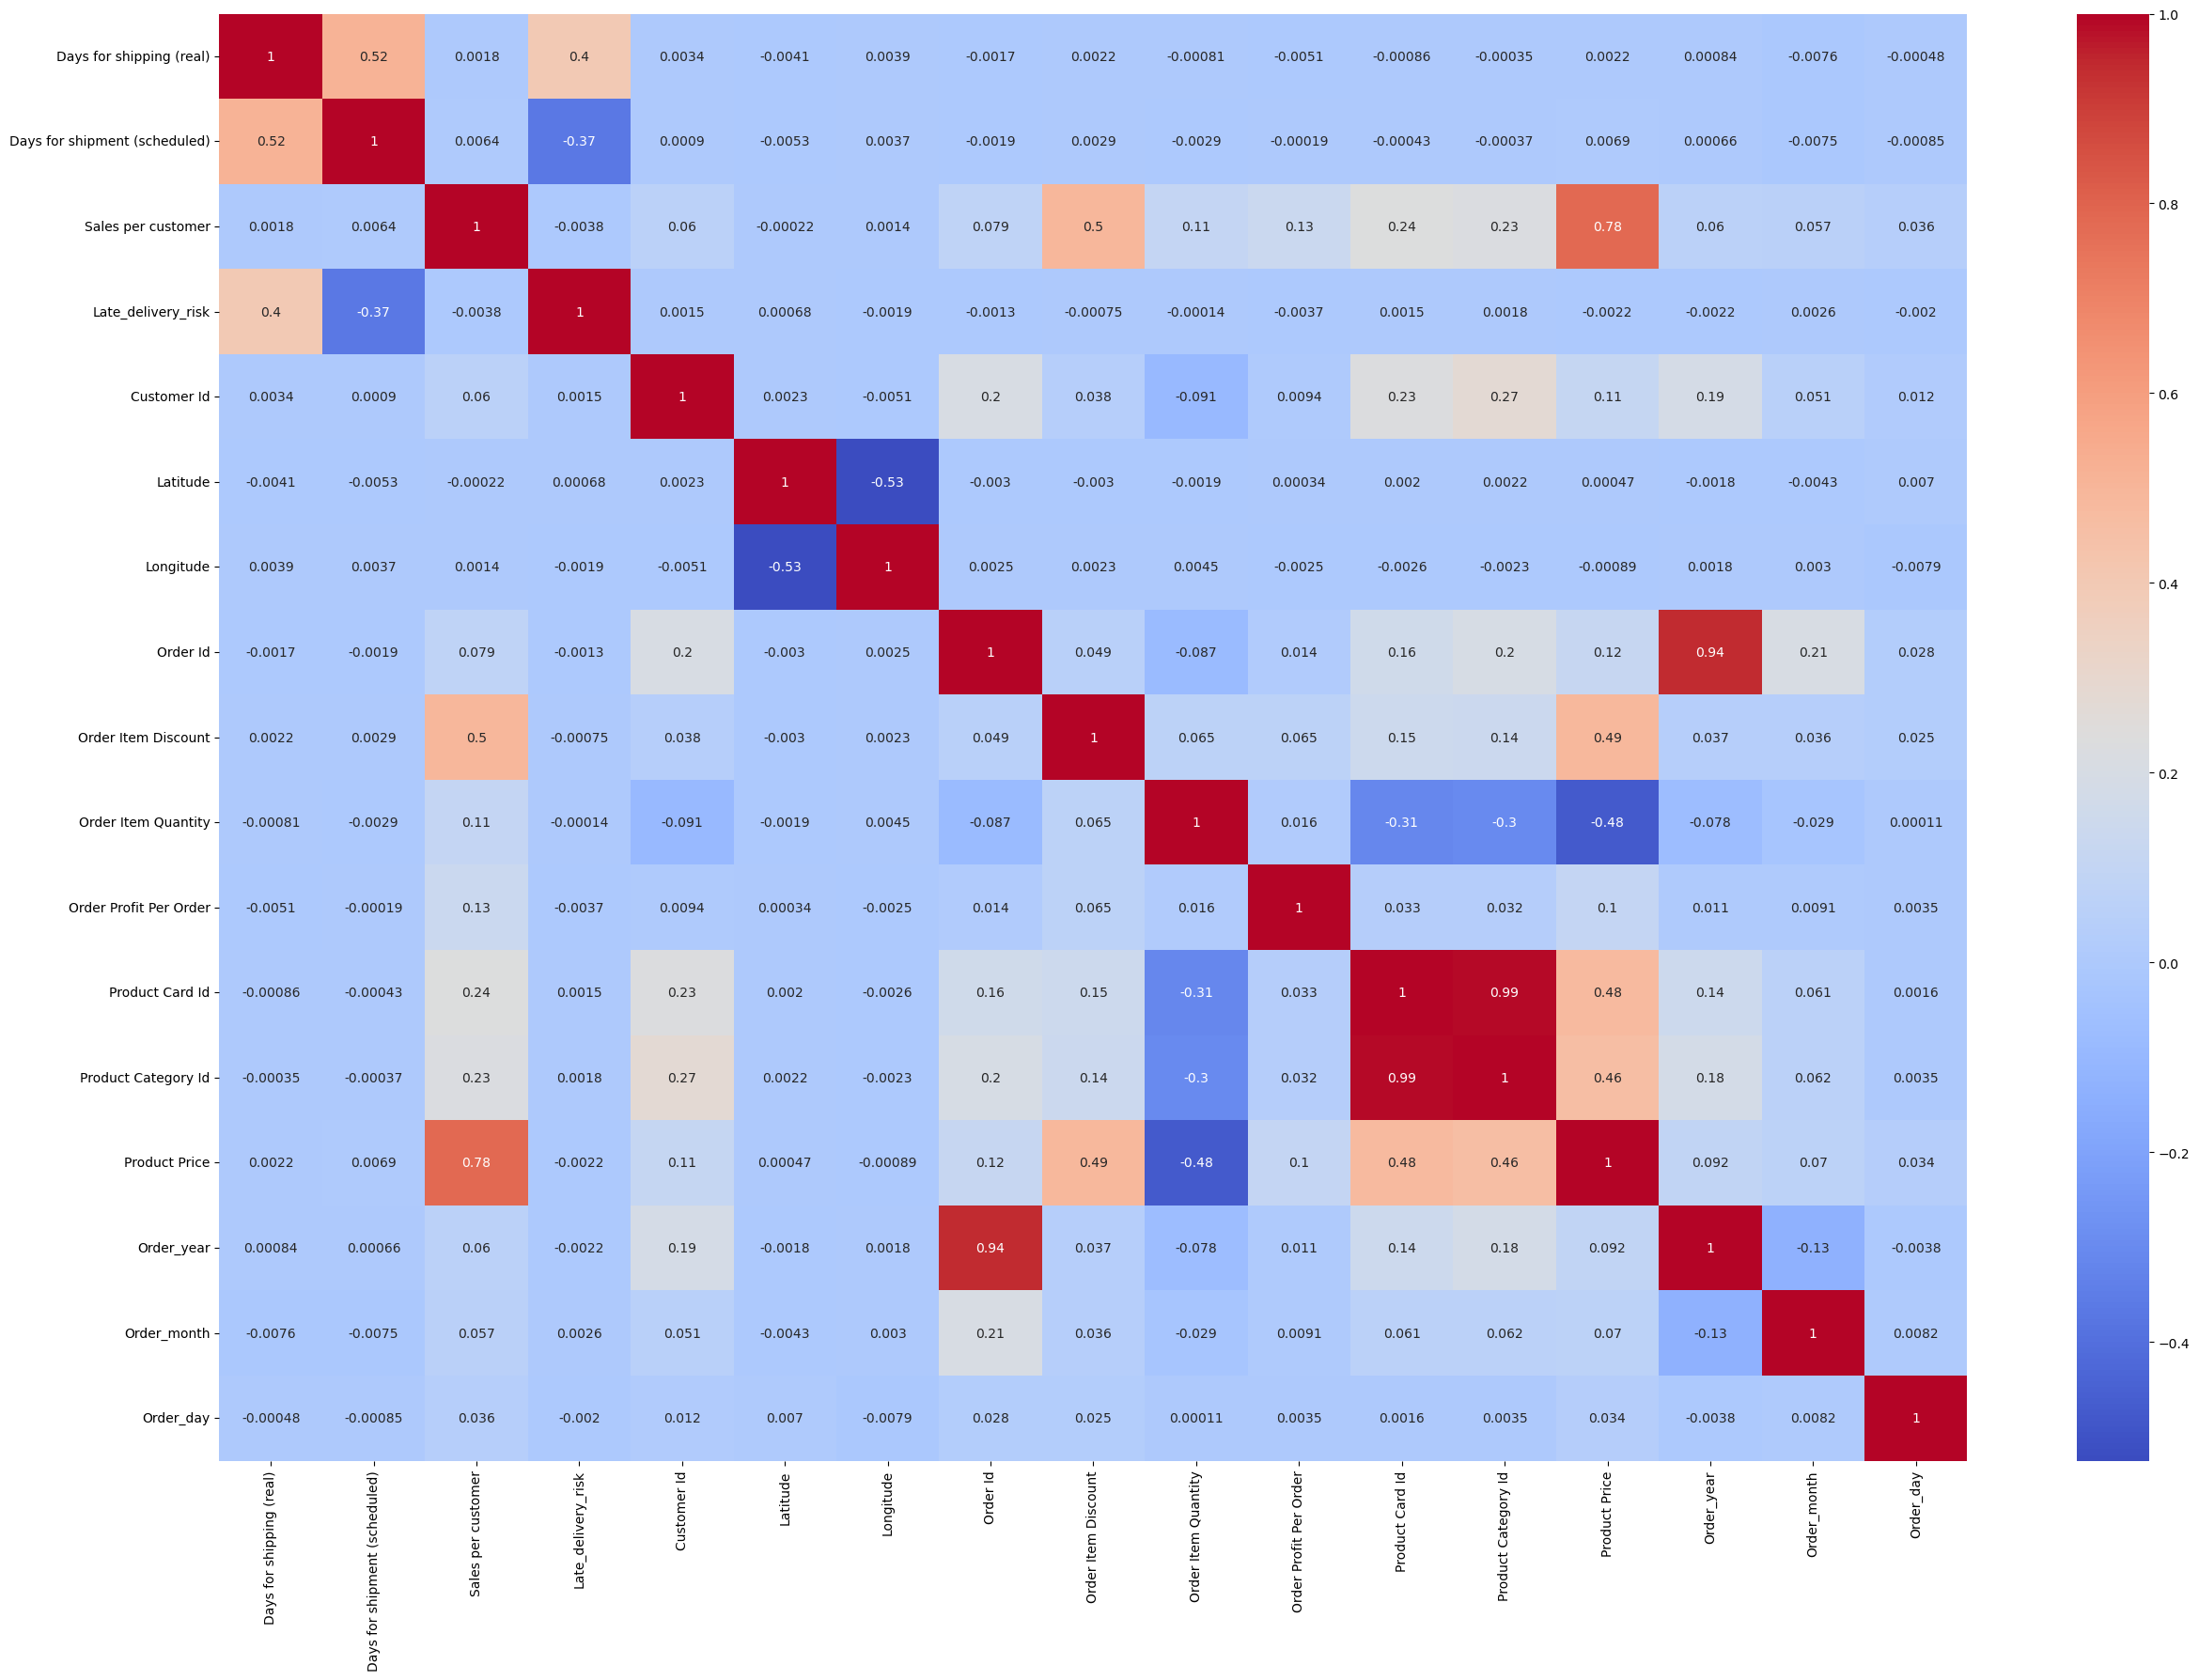

In [93]:
# after dropping columns, double check the correlation matrix of columns
corrmap = df5.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(df5[top].corr(),annot=True,cmap='coolwarm')

In [94]:
##double check if Order_year value
df5['Order_year'].value_counts()

2015    62650
2016    62550
2017    53196
2018     2123
Name: Order_year, dtype: int64

In [95]:
62650+62550+53196+2123

180519

In [96]:
##double check if Order Id value
df5['Order Id'].value_counts()

48880    5
3605     5
28265    5
50037    5
27861    5
        ..
42011    1
42068    1
42072    1
42118    1
26118    1
Name: Order Id, Length: 65752, dtype: int64

#### Observation:
- the first 5 Order Id: each has 5 items ordered
- the last 5 order Id: each has 1 item ordered only 

In [97]:
#drop Order Id, highly correlation with Order_year
df5.drop(['Order Id'],axis=1, inplace=True)

In [98]:
#drop Product Card Id, highly correlation with Product Category Id
df5.drop(['Product Card Id'],axis=1, inplace=True)

In [99]:
#sanity check
df5.shape

(180519, 32)

In [100]:
df5.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Sales per customer   Delivery Status  Late_delivery_risk   Category Name  \
0          314.640015  Advance shipping                   0  Sporting Goods   
1          311.359985     Late delivery                   1  Sporting Goods   
2          309.720001  Shipping on time                   0  Sporting Goods   
3          304.809998  Advance shipping                   0  Sporting Goods   
4          298.250000  Advance shipping                   0  Sporting Goods   

  Customer City Customer Country  Customer Id Customer Segment Customer State  \
0        Caguas      Puerto Rico        20755         Consumer             PR   
1        Caguas      Puerto Rico        19492         Consumer             PR   
2      San Jose          EE. UU.        19491         Consumer             CA   
3   Los Angeles          EE. UU.        19490      Home Office             CA   
4        Caguas      Puerto Rico        19489        Corporate             PR   

            Customer Street Department Name   Latitude   Longitude  \
0  5365 Noble Nectar Island         Fitness  18.251453  -66.037056   
1          2679 Rustic Loop         Fitness  18.279451  -66.037064   
2      8510 Round Bear Gate         Fitness  37.292233 -121.881279   
3           3200 Amber Bend         Fitness  34.125946 -118.291016   
4  8671 Iron Anchor Corners         Fitness  18.253769  -66.037048   

         Market  Order City Order Country  Order Item Discount  \
0  Pacific Asia      Bekasi     Indonesia            13.110000   
1  Pacific Asia     Bikaner         India            16.389999   
2  Pacific Asia     Bikaner         India            18.030001   
3  Pacific Asia  Townsville     Australia            22.940001   
4  Pacific Asia  Townsville     Australia            29.500000   

   Order Item Quantity  Order Profit Per Order    Order Region  \
0                    1               91.250000  Southeast Asia   
1                    1             -249.089996      South Asia   
2                    1             -247.779999      South Asia   
3                    1               22.860001         Oceania   
4                    1              134.210007         Oceania   

       Order State     Order Status  Product Category Id  Product Name  \
0  Java Occidental         COMPLETE                   73  Smart watch    
1         Rajastán          PENDING                   73  Smart watch    
2         Rajastán           CLOSED                   73  Smart watch    
3       Queensland         COMPLETE                   73  Smart watch    
4       Queensland  PENDING_PAYMENT                   73  Smart watch    

   Product Price   Shipping Mode  Order_year  Order_month  Order_day  
0         327.75  Standard Class        2018            1         31  
1         327.75  Standard Class        2018            1         13  
2         327.75  Standard Class        2018            1         13  
3         327.75  Standard Class        2018            1         13  
4         327.75  Standard Class        2018            1         13

## Part 2  Feature Engineering: 
Process to select and transform variables when building a machine learning model by following 4 steps:
- Feature Selection
- Feature Transformation
- Feature Creation
- Feature Extraction

#### Step 1: Feature Selection
select a subset of extract features which are most relevant, correlated and important to target variables

In [101]:
delivery_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Order Profit Per Order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status']
delivery = df[delivery_features]
delivery.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Late_delivery_risk  Order Profit Per Order  Sales per customer   Latitude  \
0                   0               91.250000          314.640015  18.251453   
1                   1             -249.089996          311.359985  18.279451   
2                   0             -247.779999          309.720001  37.292233   
3                   0               22.860001          304.809998  34.125946   
4                   0              134.210007          298.250000  18.253769   

    Longitude   Shipping Mode     Order Status    Order Region Order Country  \
0  -66.037056  Standard Class         COMPLETE  Southeast Asia     Indonesia   
1  -66.037064  Standard Class          PENDING      South Asia         India   
2 -121.881279  Standard Class           CLOSED      South Asia         India   
3 -118.291016  Standard Class         COMPLETE         Oceania     Australia   
4  -66.037048  Standard Class  PENDING_PAYMENT         Oceania     Australia   

   Order City        Market   Delivery Status  
0      Bekasi  Pacific Asia  Advance shipping  
1     Bikaner  Pacific Asia     Late delivery  
2     Bikaner  Pacific Asia  Shipping on time  
3  Townsville  Pacific Asia  Advance shipping  
4  Townsville  Pacific Asia  Advance shipping

In [102]:
#sanity check
delivery.shape

(180519, 15)

####  Add Features
- include order year,  month, and day to make it easier to find trend,patterns,seasonality cycles from the data.  

In [103]:
# update delivery to include year,  month and day for columns Order_Date, Shipping_Date:
delivery_features_updated = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Order Profit Per Order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status', 'Order_year','Order_month', 'Order_day']
delivery_updated = df[delivery_features_updated]
delivery_updated.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Late_delivery_risk  Order Profit Per Order  Sales per customer   Latitude  \
0                   0               91.250000          314.640015  18.251453   
1                   1             -249.089996          311.359985  18.279451   
2                   0             -247.779999          309.720001  37.292233   
3                   0               22.860001          304.809998  34.125946   
4                   0              134.210007          298.250000  18.253769   

    Longitude   Shipping Mode     Order Status    Order Region Order Country  \
0  -66.037056  Standard Class         COMPLETE  Southeast Asia     Indonesia   
1  -66.037064  Standard Class          PENDING      South Asia         India   
2 -121.881279  Standard Class           CLOSED      South Asia         India   
3 -118.291016  Standard Class         COMPLETE         Oceania     Australia   
4  -66.037048  Standard Class  PENDING_PAYMENT         Oceania     Australia   

   Order City        Market   Delivery Status  Order_year  Order_month  \
0      Bekasi  Pacific Asia  Advance shipping        2018            1   
1     Bikaner  Pacific Asia     Late delivery        2018            1   
2     Bikaner  Pacific Asia  Shipping on time        2018            1   
3  Townsville  Pacific Asia  Advance shipping        2018            1   
4  Townsville  Pacific Asia  Advance shipping        2018            1   

   Order_day  
0         31  
1         13  
2         13  
3         13  
4         13

In [104]:
#sanity check
delivery_updated.shape

(180519, 18)

In [105]:
#check data types
delivery_updated.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Late_delivery_risk                 int64
Order Profit Per Order           float64
Sales per customer               float64
Latitude                         float64
Longitude                        float64
Shipping Mode                     object
Order Status                      object
Order Region                      object
Order Country                     object
Order City                        object
Market                            object
Delivery Status                   object
Order_year                         int64
Order_month                        int64
Order_day                          int64
dtype: object

#### Step 2: Feature Creation
- Creating new features 'days_difference' from the exiting data , columns "Days for shipping (real)' and 'Days for shipment (scheduled)' and  not independent of each other,'days_difference' would provide more insights such as identifying potential bottlenecks or inefficiencies in the shipping process.

In [106]:
# create the target variable for regression

#any negative numner indicate days late than promised delivery time.

delivery_updated['days_difference']=delivery_updated['Days for shipping (real)']-delivery_updated['Days for shipment (scheduled)'] 

C:\Users\viplu\AppData\Local\Temp\ipykernel_2900\3838966249.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_updated['days_difference']=delivery_updated['Days for shipping (real)']-delivery_updated['Days for shipment (scheduled)']


-  drop 'Days for shipment (scheduled)'
Since Days for shipment (scheduled) is a fixed value that is decided upon when the order is placed, and Days for shipping (real) is the actual number of days it took for the item to be shipped, it may be more appropriate to drop 'Days for shipment (scheduled)'
- drop 'Days for shipping (real)'

- drop columns 'Delivery Status' (indicates late or early shipment),  'late_delivery_risk' column (tells the products with late delivery risk are delivered late.

In [107]:
delivery_updated['days_difference'].value_counts()

 1    60647
 0    33753
 2    28718
-1    21700
-2    21666
 3     7052
 4     6983
Name: days_difference, dtype: int64

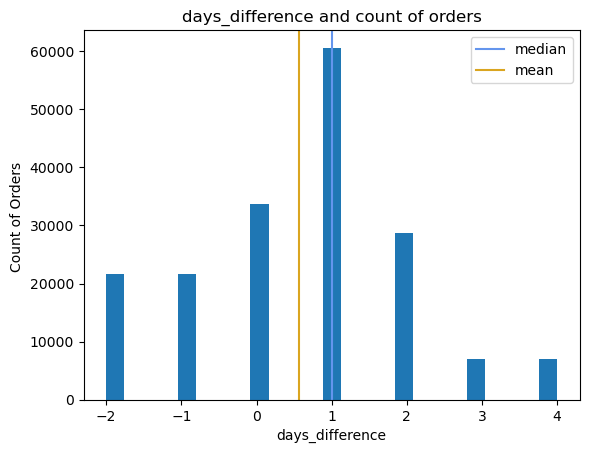

In [108]:
# Plot distribution of target variable: days_difference

plt.figure()
plt.hist(delivery_updated['days_difference'], bins=25)
plt.xlabel('days_difference')
plt.ylabel('Count of Orders ')
plt.title('days_difference and count of orders')


plt.axvline(delivery_updated['days_difference'].median(), label='median', color='cornflowerblue')
plt.axvline(delivery_updated['days_difference'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

#### Observation: 
- the days of difference appears as a normal distribution, 
- the median is 1 day late; mojority orders (around 60000) are 1 day late.
- while around 20000 deliveries are either 2 days or 1 day early, around 35000 deliveries on time.
- around 30000 deliveries are 2 days late
- in some extream case: 5000 deliveries are either 3 or 4 days late.

#### Step 3: Feature Extraction
- Reduce the number of features, decrease the complexity of the model and potentially reduce the running time. 
- Lets check the correlations, this should always be done prior to regression modelling In particular we are going to check the correlations between the independent variables

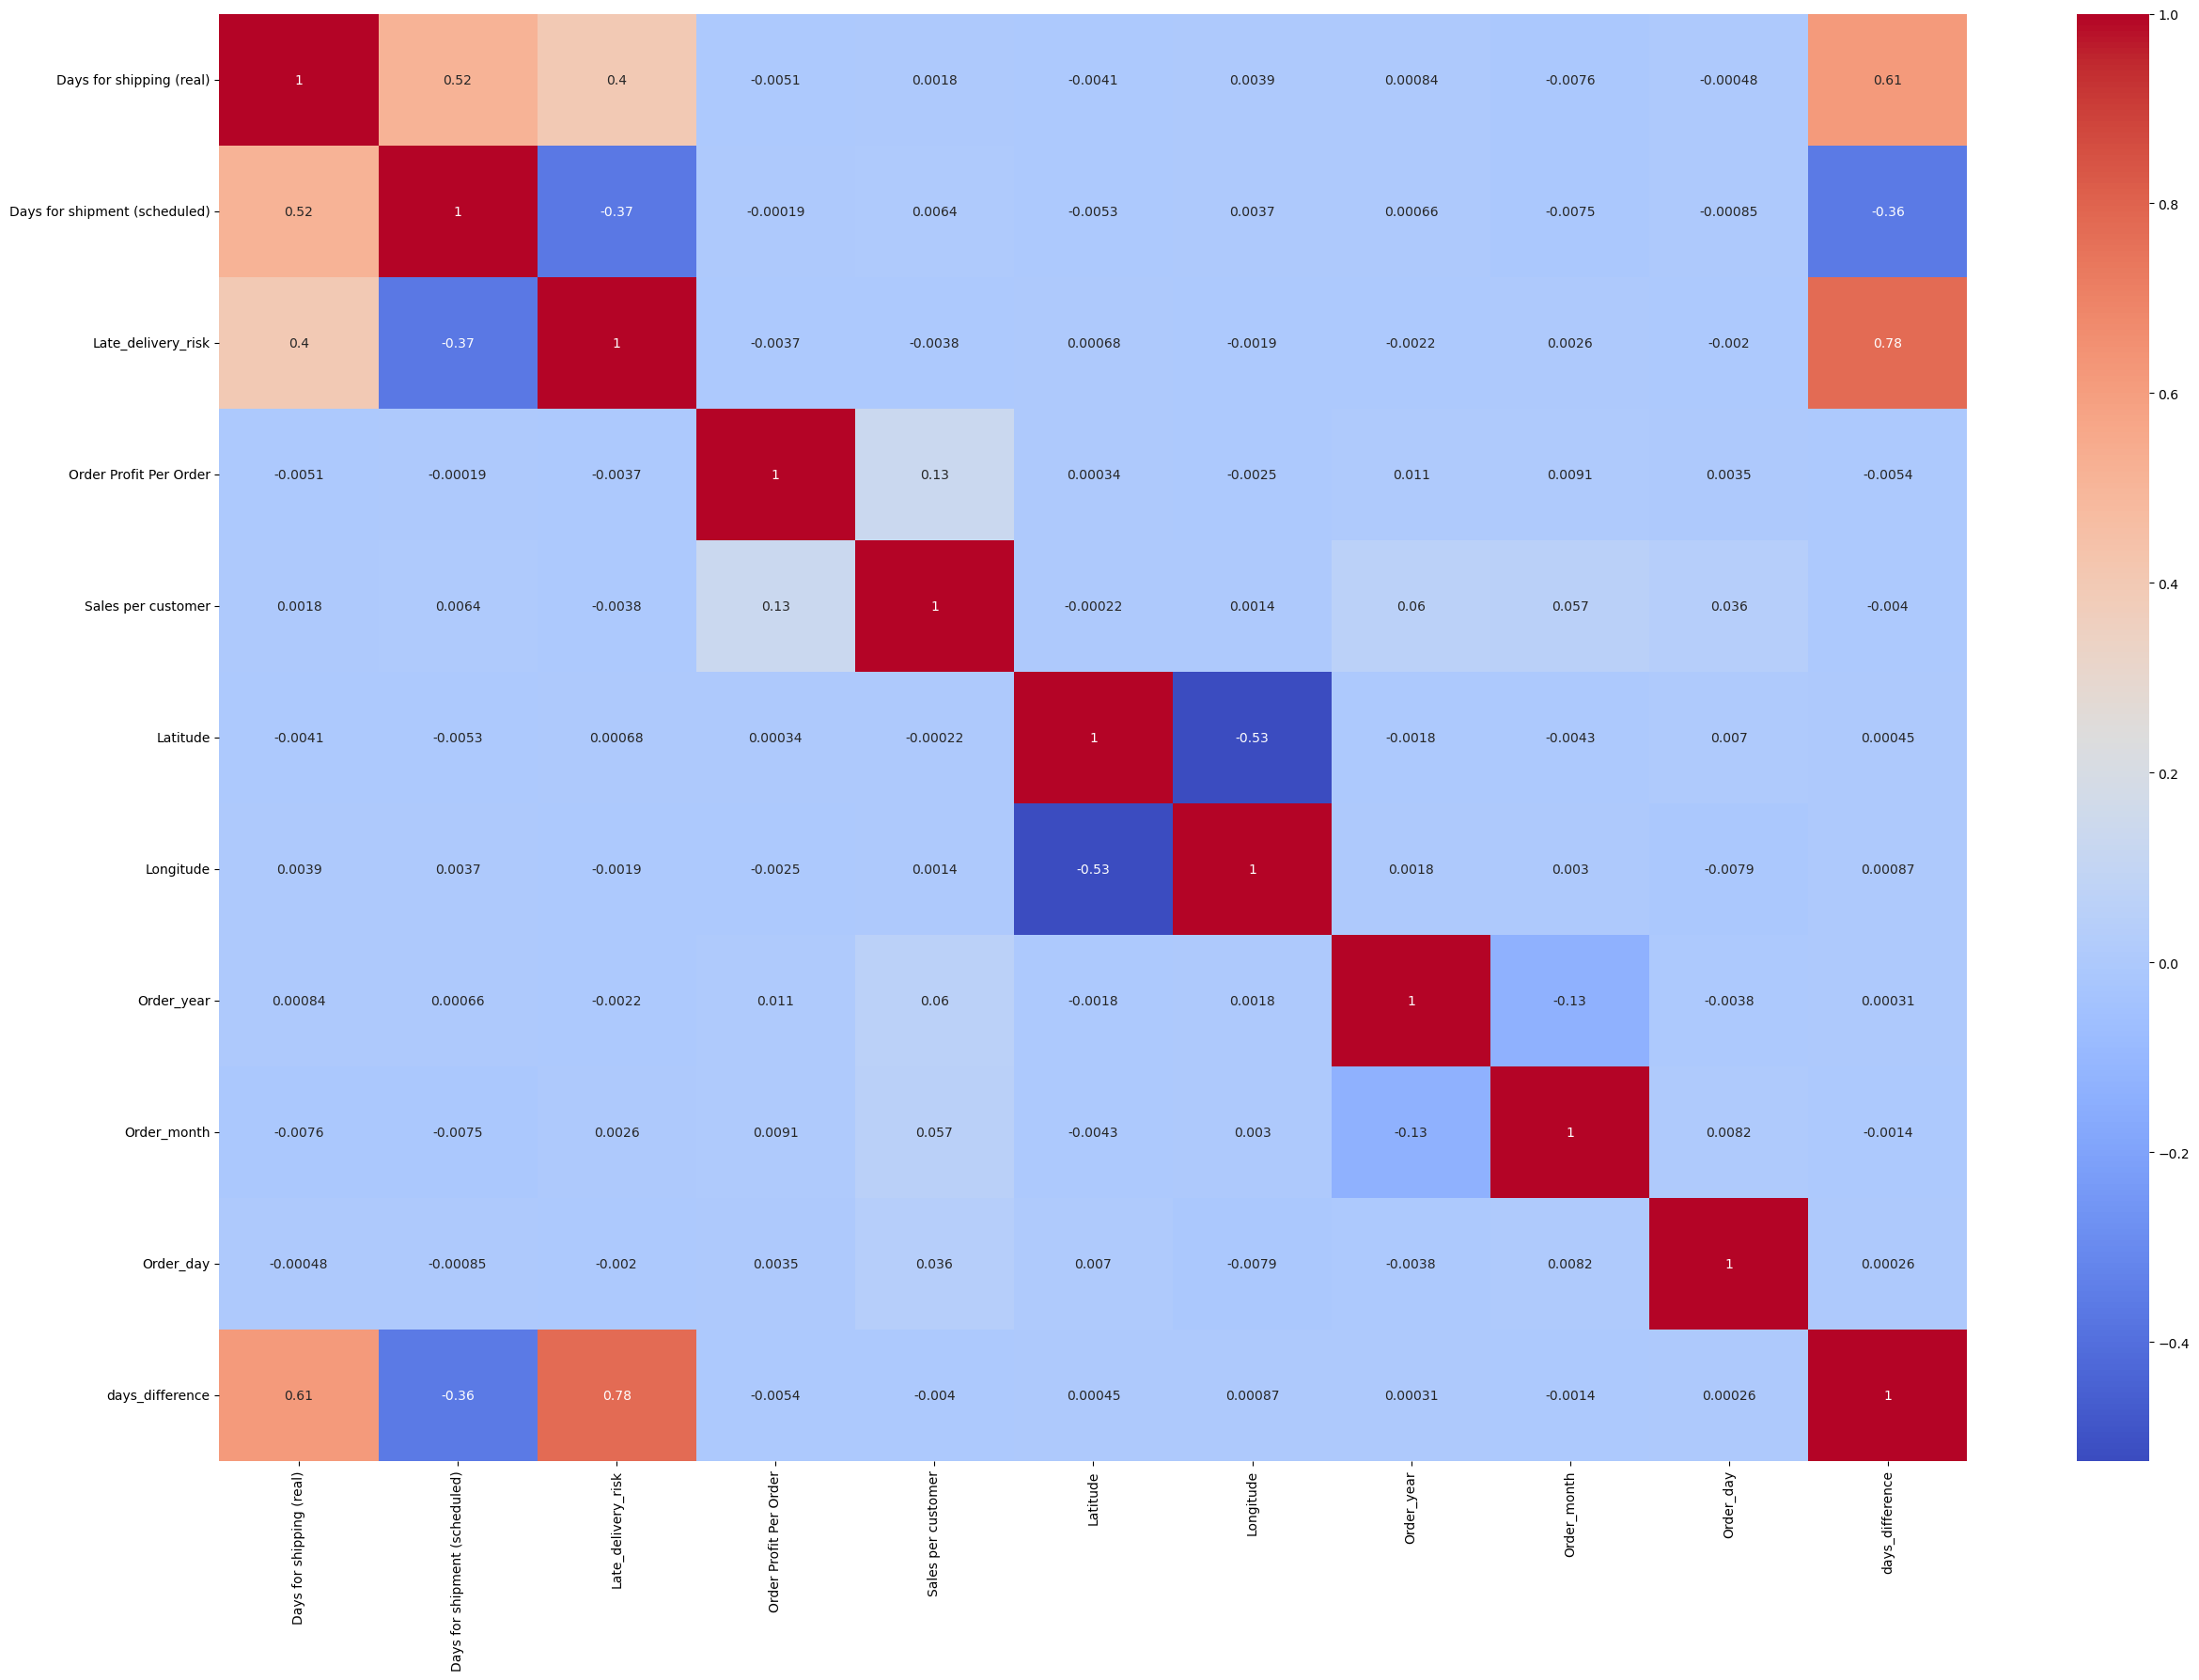

In [127]:
#plot heatmap
corrmap = delivery_updated.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(delivery_updated[top].corr(),annot=True,cmap='coolwarm')

#### Observations and insights:
- Delivery Status column has 3 sub-categories: Late delivery, Advance shipping, Shipping on time that may cause data leaking to the target days_difference, same with Late_delivery_risk, 
- when those two columns are included in the X, the model train accuracy is 100% while the test accuracy is 99.7% by both decision tree and random forest. in order to avoid overfitting, we have to drop these two columns
- Columns Days for shipment (scheduled) and Days for shipping (real) are used to create the new feature days_difference; even though the correlation is not as high as 0.8, but when keep only one of them, the model is still over fitting with train accuracy is 100%, test accuracy as high as 99.6%, in order to generate reasonable results, we have to drop these two columns.

#### Commments 
- Multicollinearity is not a problem for non-parametric machine learning models like K-Nearest Neighbors (KNN), decision trees, and random forest regression. These models do not make assumptions about the relationship between the independent variables and the dependent variable, so multicollinearity is not an issue. However, it is still important to preprocess and select relevant features before fitting the model to avoid overfitting and improve model performance.
- To measure machine models accurately all the columns with repeated values are dropped like late_delivery_risk column because, it is known all the products with late delivery risk are delivered late. the same with delivery Status column because there is a chance machine learning model might take values directly from these columns to predict output.

In [110]:
 
df6 = delivery_updated.drop(['Days for shipment (scheduled)','Days for shipping (real)','Delivery Status' , 'Late_delivery_risk'], axis=1)

In [111]:
#sanity check
df6.shape

(180519, 15)

In [112]:
#It is important to check the type of variables in the data because machine learning models can only be trained with numerical values.
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Type                    180519 non-null  object 
 1   Order Profit Per Order  180519 non-null  float64
 2   Sales per customer      180519 non-null  float64
 3   Latitude                180519 non-null  float64
 4   Longitude               180519 non-null  float64
 5   Shipping Mode           180519 non-null  object 
 6   Order Status            180519 non-null  object 
 7   Order Region            180519 non-null  object 
 8   Order Country           180519 non-null  object 
 9   Order City              180519 non-null  object 
 10  Market                  180519 non-null  object 
 11  Order_year              180519 non-null  int64  
 12  Order_month             180519 non-null  int64  
 13  Order_day               180519 non-null  int64  
 14  days_difference     

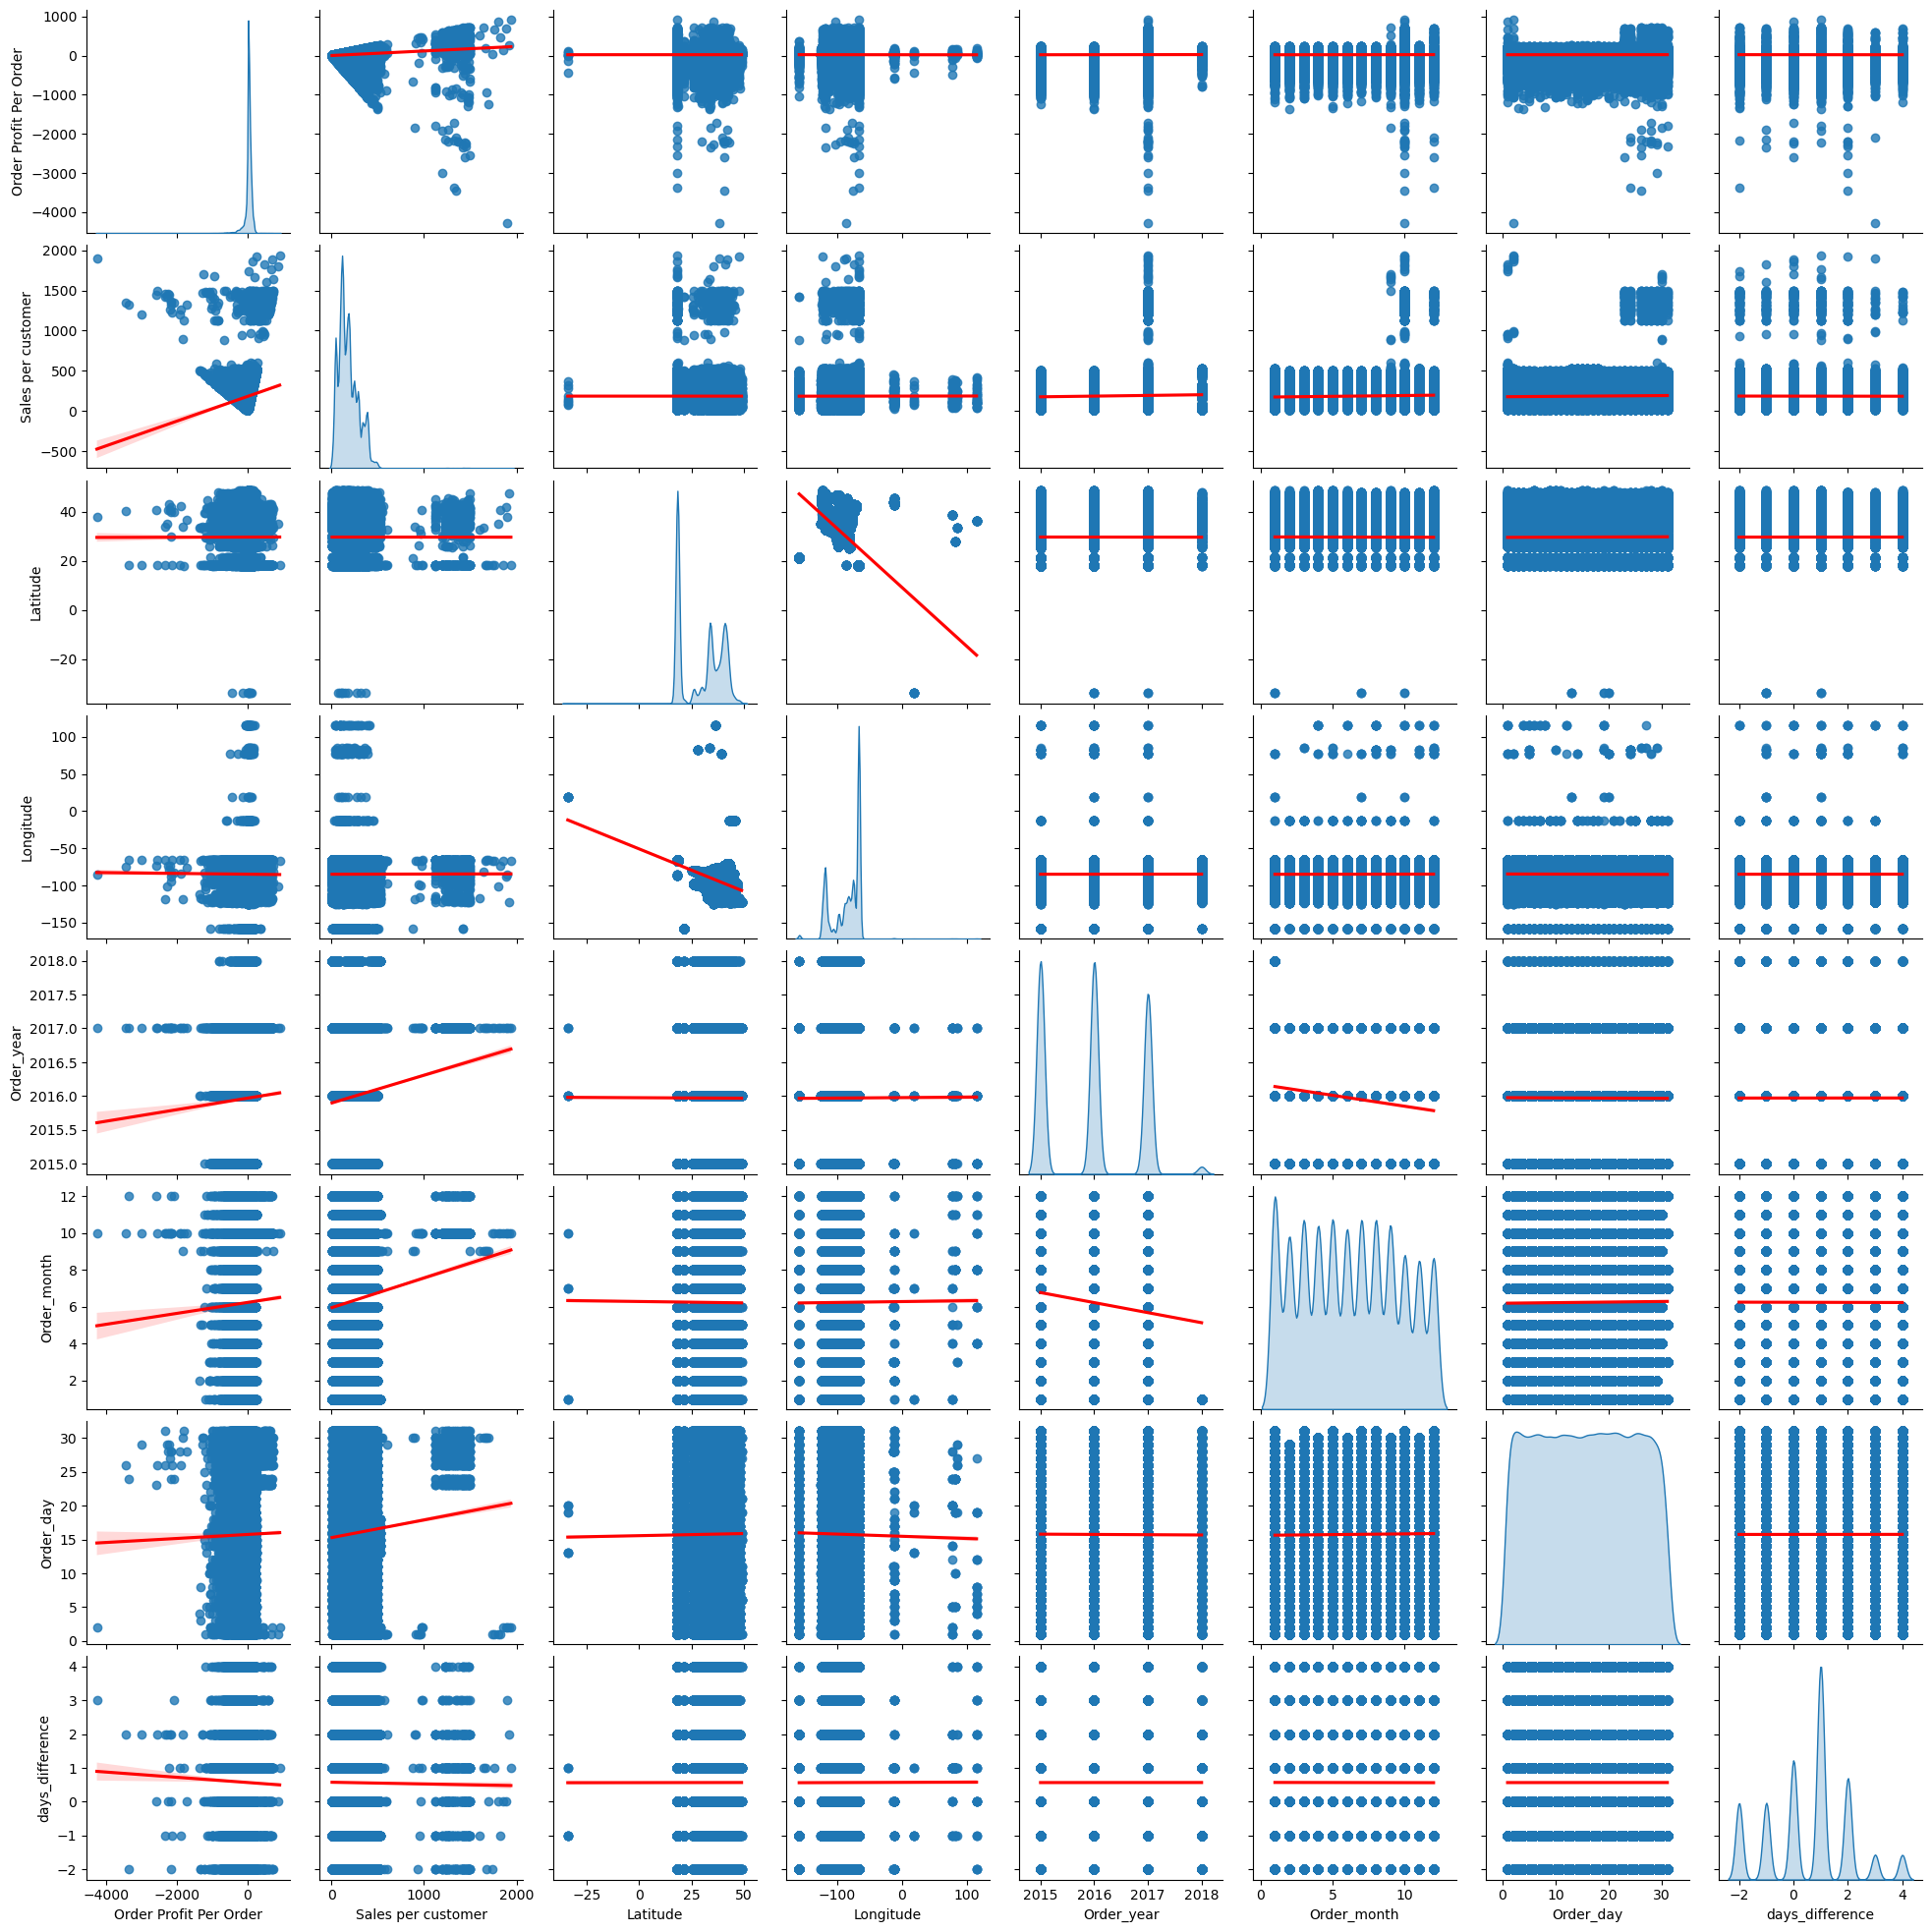

In [113]:
#pairplot:
sns.pairplot(df6, diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})


#### Observation: 
- from the pair plot, we can tell there is no high correlation or multicollinearity, ready for the model. 

## Part 3: Regression models

In [114]:
model_data = df6.copy()
model_data.head()

Type  Order Profit Per Order  Sales per customer   Latitude  \
0     DEBIT               91.250000          314.640015  18.251453   
1  TRANSFER             -249.089996          311.359985  18.279451   
2      CASH             -247.779999          309.720001  37.292233   
3     DEBIT               22.860001          304.809998  34.125946   
4   PAYMENT              134.210007          298.250000  18.253769   

    Longitude   Shipping Mode     Order Status    Order Region Order Country  \
0  -66.037056  Standard Class         COMPLETE  Southeast Asia     Indonesia   
1  -66.037064  Standard Class          PENDING      South Asia         India   
2 -121.881279  Standard Class           CLOSED      South Asia         India   
3 -118.291016  Standard Class         COMPLETE         Oceania     Australia   
4  -66.037048  Standard Class  PENDING_PAYMENT         Oceania     Australia   

   Order City        Market  Order_year  Order_month  Order_day  \
0      Bekasi  Pacific Asia        2018            1         31   
1     Bikaner  Pacific Asia        2018            1         13   
2     Bikaner  Pacific Asia        2018            1         13   
3  Townsville  Pacific Asia        2018            1         13   
4  Townsville  Pacific Asia        2018            1         13   

   days_difference  
0               -1  
1                1  
2                0  
3               -1  
4               -2


###### One Hot Encoding
- The current categorical variables (such as Types,Delivery Status and Shipping Mode) in the dataset are in the form of object (text or string). Machine learning models are not able to directly handle such categorical variables, we need to transform them into numerical values: machine learning algorithms work better with numerical data.
- With 164 countries, almost 3600 cities, transform categorical columns of X_train, X_val  after train/test split will result errors with different shapes of train set and validation set: column number differs.
- So we'll transform categorical columns first, then split train and test set

In [115]:
model_data = pd.get_dummies(model_data)

In [116]:
#Set independant variables as X
X = model_data.drop(['days_difference'],axis=1)

# Set Target Variables as y
y = model_data['days_difference']
X.shape,y.shape

((180519, 3813), (180519,))

In [117]:
#split data into train and test by 80 : 20
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=16)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (144415, 3813)
Shape of y_train: (144415,)
Shape of X_test: (36104, 3813)
Shape of y_test: (36104,)


In [118]:
#split data into train and test by 80 : 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (144415, 3813)
Shape of y_train: (144415,)
Shape of X_test: (36104, 3813)
Shape of y_test: (36104,)


### Scale and Transform data

In [119]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##                          Baseline Models 

### Model 1: KNN
- instantiate and fit KNN model
- predict
- evaluate the model

In [120]:
### KNN with train and test set###

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Instantiate & fit the KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict the target variables on the test set
y_pred = knn.predict(X_test_scaled)

# Model Evaluation: calculate the R-squared score, MSE, MAE


print('KNN - test-R2 score:', r2_score(y_test, y_pred))
print('KNN - test-Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('KNN - test-Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

KNN - test-R2 score: 0.39965476057248595
KNN - test-Mean Squared Error: 1.3379027254597828
KNN - test-Mean Absolute Error: 0.8427044094837137


### Findings from KNN Model:
The test set evaluation from  KNN regression model consists of three metrics:
- KNN - test-R2 score: 0.3997
This indicates that the KNN model explains 39.97% of the variance in the target variable on the test set, which is not as good as the performance of the Random Forest model.

- KNN - test-Mean Squared Error: 1.3379
This measures the average squared difference between the predicted and actual values of the target variable on the test set. The KNN model has a higher MSE than the Random Forest model, which means that the KNN model's predictions are farther away from the actual values on average.

- KNN - test-Mean Absolute Error: 0.8427
This measures the average absolute difference between the predicted and actual values of the target variable on the test set. The KNN model has a higher MAE than the Random Forest model, which means that the KNN model's predictions are farther away from the actual values on average.

Overall, the test set evaluation shows that the KNN model performs worse than the Random Forest model on this task.

### Model 2: Decision Tree 

#### - Scaling is not strictly necessary for decision trees and random forests because they are based on a series of binary splits that are invariant to monotonic transformations of the input data. In other words, scaling the data will not affect the relative ordering of the feature values, and therefore it should not impact the performance of the models.

In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


# Instantiate & fit the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Predict values for test set
y_pred = model.predict(X_test_scaled)

# Model Evaluation: calculate the R-squared score, MSE, MAE:
# R-squared is not always the best metric to use for model evaluation, as it can be sensitive to outliers and may not give a complete picture of model performance.  
# so we'll evaluate together with MSE and MAE 

print('Decision Tree - test-R2 score:', r2_score(y_test, y_pred))
print('Decision Tree - test-Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Decision Tree - test-Mean Absolute Error:', mean_absolute_error(y_test,y_pred ))

Decision Tree - test-R2 score: 0.6666905717464134
Decision Tree - test-Mean Squared Error: 0.7427985818745846
Decision Tree - test-Mean Absolute Error: 0.3136494571238644


In [122]:
DTmodel = DecisionTreeRegressor(max_depth=3)
DTmodel.fit(X_train_scaled, y_train)

print(f"DT R^2 score on training set: {model.score(X_train_scaled, y_train):0.3f}")
print(f"DT R^2 score on test set: {model.score(X_test_scaled, y_test):0.3f}")

DT R^2 score on training set: 1.000
DT R^2 score on test set: 0.667


 ### Findings from Decision Tree Model:
The test set evaluation from  decision tree regression model consists of three metrics: 
 
 - R2 score: 0.661, indicating that the model explains about 66.7% of the variation in the target variable in the test set. 
 - The mean squared error (MSE) on the test set is 0.742, which is a measure of the average squared difference between the predicted and actual values. 
 - The mean absolute error (MAE) on the test set is 0.314, which is a measure of the average absolute difference between the predicted and actual values.

- The decision tree model has a perfect R-squared score of 1.000 on the training set, indicating that the model fits the training data perfectly. However, the R2 score on the test set is lower than the training set, which suggests that the model is overfitting to the training data and may not generalize well to new, unseen data. This highlights the need for hyperparameter tuning and regularization techniques to improve the performance of the model on the test set.

### Model 3: Random Forests 
- Reasoning to use this model: it is extension of decision trees that uses an ensemble of decision trees. It combines multiple decision trees and aggregates their predictions to make a final prediction. This helps to reduce the overfitting issue of decision trees and improves the model's performance. 
- Random forests can handle both categorical and continuous data, can also provide a measure of feature importance.

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Start timer
start_time = time.time()

# Instantiate & fit the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Predict the target variables on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Model Evaluation: calculate the R-squared score, MSE, MAE: 
# R-squared is not always the best metric to use for model evaluation, as it can be sensitive to outliers and may not give a complete picture of model performance.  
# so we'll evaluate together with MSE and MAE 


print('Random Forest - test-R2 score:', r2_score(y_test, y_pred))
print('Random Forest - test-Mean Squared Error:', mean_squared_error(y_test, y_pred)) #MSE:The mean squared error
print('Random Forest - test-Mean Absolute Error:', mean_absolute_error(y_test, y_pred))#MAE:

# End timer and print elapsed time
print('Elapsed time:', time.time() - start_time)


Random Forest - test-R2 score: 0.7454299962427565
Random Forest - test-Mean Squared Error: 0.5673233990693552
Random Forest - test-Mean Absolute Error: 0.527344338577443
Elapsed time: 7990.15921330452


 ### Findings from Random Forest Model:
The test set evaluation from  random forest regression model consists of three metrics:

- R2 score: This metric is also known as the coefficient of determination and measures the proportion of variance in the target variable that is explained by the model. In this case, the random forest model achieved an R2 score of 0.745, which indicates that the model explains 74.5% of the variance in the target variable.

- Mean Squared Error (MSE): This metric measures the average squared difference between the predicted and actual target values. A lower MSE indicates better performance, and in this case, the random forest model achieved a test MSE of 0.567.

- Mean Absolute Error (MAE): This metric measures the average absolute difference between the predicted and actual target values. Like the MSE, a lower MAE indicates better performance, and in this case, the random forest model achieved a test MAE of 0.527.

Overall, the test set evaluation suggests that the random forest model is performing well in predicting the target variable on unseen data.


### Models Comparison and Explanation: 

#### Comparision Table for evaluation results

In [124]:
# Lets put these evaluation results in a dataframe
import pandas as pd

# Create a dictionary of model results
results = {'KNN': [0.3997, 1.3379, 0.8427],
           'Decision Tree': [0.6667, 0.7428, 0.3136],
           'Random Forest': [0.7454, 0.5673, 0.5273]}

# Create a DataFrame from the dictionary
df_results = pd.DataFrame(results, index=['R2 score', 'Mean Squared Error', 'Mean Absolute Error'])

# Print the DataFrame
print(df_results)

                        KNN  Decision Tree  Random Forest
R2 score             0.3997         0.6614         0.7452
Mean Squared Error   1.3379         0.7546         0.5678
Mean Absolute Error  0.8427         0.3178         0.5278


### Comparison and Explanation 

- As we can see, the Random Forest model outperforms both the KNN and Decision Tree models in terms of all three evaluation metrics (R2 score, Mean Squared Error, and Mean Absolute Error).

- The KNN model performs the worst out of the three models, with a relatively low R2 score and high error values. This may be due to the fact that KNN is a simple and fast algorithm that can be effective for small or well-structured datasets with continuous features. However, it can be sensitive to noisy or irrelevant features and may struggle with high-dimensional datasets.

- The Decision Tree model performs better than the KNN model, but still has a lower R2 score and higher error values than the Random Forest model. Decision Trees are prone to overfitting, which may have affected the model's performance on the test data.

- On the other hand, the Random Forest model performs the best out of the three models. Random Forests are an ensemble method that combine multiple decision trees and reduce the risk of overfitting by using bootstrapping and random feature selection during training. This may have contributed to the model's superior performance on the test data. 

- Additionally, Random Forest models are known to work well with high-dimensional datasets like the one used in this project, as a more complex and powerful algorithm , it can handle noisy or irrelevant features, provide feature importances, which can be useful for feature selection. 

- However, it can be computationally expensive and may overfit if not properly tuned.

### Check and determine how the different factors impact the target:  days_difference and On-Time Delivery

In [125]:
# Get feature importances and corresponding column names
feature_importances = list(zip(X_train.columns, rf_regressor.feature_importances_))

# Sort feature importances by importance value in descending order and keep top 20
sorted_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)[:20]

# Print top 20 features and their importance values
print("Top 20 features and their importance values:")
for i, (feature, importance) in enumerate(sorted_importances):
    print("{}. {} ({:.6f})".format(i+1, feature, importance))

Top 20 features and their importance values:
1. Shipping Mode_Second Class (0.220524)
2. Latitude (0.095628)
3. Longitude (0.078755)
4. Order_day (0.053718)
5. Shipping Mode_Standard Class (0.046007)
6. Order Profit Per Order (0.040962)
7. Sales per customer (0.037937)
8. Order_month (0.035114)
9. Order_year (0.012266)
10. Shipping Mode_First Class (0.009491)
11. Order Status_COMPLETE (0.005661)
12. Type_TRANSFER (0.005532)
13. Order Status_PROCESSING (0.005185)
14. Order Status_PENDING (0.005056)
15. Type_DEBIT (0.005007)
16. Order Status_PENDING_PAYMENT (0.004207)
17. Type_PAYMENT (0.004087)
18. Order Status_ON_HOLD (0.003526)
19. Market_Pacific Asia (0.003337)
20. Order Status_CLOSED (0.003171)


#### Observations and insights:
- It's more appropriate to say that the "Shipping Mode" feature, specifically the "Second Class" category, is the most important feature to predict the target. This feature has the highest importance value of (0.220524), indicating that it is the most important feature for predicting the target variable, has a strong impact on the target variable.

- Latitude (0.095855): This feature has the second-highest importance value, indicating that it is an important feature for predicting the target variable,it suggests that the geographical location of the customer plays a role in determining the target variable.

- Longitude (0.078671): This feature has the third-highest importance value, indicating that it is also an important feature for predicting the target variable, it suggests that the longitude of the customer's location also plays a role in determining the target variable.

- Order_day (0.053720): This feature has the fourth-highest importance value, indicating that it is an important feature for predicting the target variable,it suggests that the day of the week on which the order was placed has an impact on the target variable.

- Shipping Mode_Standard Class (0.046007): This feature has the fifth-highest importance value, indicating that it is also an important feature for predicting the target variable. It suggests that the shipping mode of Standard Class also plays a role in determining the target variable.

- Order Profit Per Order (0.040846): This feature has the sixth-highest importance value, indicating that it is an important feature for predicting the target variable. It suggests that the profit obtained per order has an impact on the target variable.

- Sales per customer (0.038054): This feature has the seventh-highest importance value, indicating that it is also an important feature for predicting the target variable. It suggests that the amount of sales per customer also plays a role in determining the target variable.

- Order_month (0.035057): This feature has the eighth-highest importance value, indicating that it is an important feature for predicting the target variable. It suggests that the month in which the order was placed has an impact on the target variable.

- Order_year (0.012221): This feature has the ninth-highest importance value, indicating that it is still important for predicting the target variable, but less so than the features above it. It suggests that the year in which the order was placed has a lesser impact on the target variable.

- Shipping Mode_First Class (0.009491): This feature has the tenth-highest importance value, indicating that it is also an important feature for predicting the target variable, but less so than the features above it. It suggests that the shipping mode of First Class also plays a role in determining the target variable, but not as strongly as Second Class and Standard Class.

- Order Status_COMPLETE (0.005550): This feature has the eleventh-highest importance value, indicating that it is still somewhat important for predicting the target variable, but less so than the features above it. It suggests that the order status of COMPLETE has an impact on the target variable.

- Type_TRANSFER (0.005518): This feature has the twelfth-highest importance value, indicating that it is still somewhat important for predicting the target variable, but less so than the features above it. It suggests that the payment type of TRANSFER has an impact on the target variable, because lots of fraud or fraudulent oders are related to payment by transfer.

- Order Status_PROCESSING (0.005199): This feature has the thirteenth-highest importance value, indicating that it is still somewhat important for predicting the target variable, but less so than the features above it. It suggests that the order status of in PROCESSING has an impact on the target variable.

- Type_DEBIT (0.005081): This feature has the fourteenth-highest importance value, indicating that it is still somewhat important for predicting the target variable, but less so than the features above it. It suggests that payment by debit card has an impact on the target variable.

- Order Status_PENDING (0.005041): This feature has the fifteenth-highest importance value, indicating that it is still somewhat important for predicting the target variable, but less so than the features above it. It suggests that order with pending status may slow down the fulfillment process and has an impact on the target variable.

### Interpretation and Suggestions: 
#### Shipping Mode
- Based on the analysis, the most important variable to predict the target is Shipping Mode, specifically, the Second Class (2-day delivery) option, which actually takes from 2 days up to 6 days for delivery. This poor performance has the strongest impact on the target and on-time delivery, despite only 19.51% of delivery being made through this option. 
- In contrast, Standard Class (4-day delivery) accounts for 59.69% of shipments, and has a higher portion of early and on-time delivery compared to late shipment, making it less important in determining the target variable than Second Class. Similarly, First Class (1-day delivery) only accounts for 15.41% of shipments, has less order counts and only 1 day late, thus has much less impact on the target variable. 
- Recall the current Shipping Mode and Percentage of delivery: 
       -Standard Class    59.69%
       -Second Class      19.51%
       -First Class       15.41%
       -Same Day           5.39%
- Therefore, it is recommended that the company further investigate the causes of the poor performance, specifically, Second Class delivery, including both carrier-side and internal operational factors, and take appropriate measures to improve it.

#### Latitude and Longitude
- It is easy to understand that the customer's location plays a role in determining the target variable.

#### Order_day 
- This feature has the fourth-highest importance value, suggests that the day of the week on which the order was placed has an impact on the target variable, the company should further investigate, add value to the process and reduce waste.

#### Order Profit and Sales per customer
-  It is possible that higher profit and higher sales orders are given a higher priority in terms of shipping and delivery, as they may be more valuable to the company. But it's important to note that the choice of shipping mode is influenced by various factors, including cost, delivery time, customer preferences, and more.

#### Order Status and Payment Type
- They both are factors related to the company's operational process.
- Delays or slow processing of orders may lead to longer delivery times, affecting the target variable and on-time delivery.
- Therefore, it is important for the company to optimize its order processing and payment procedures to improve its delivery performance.

### Part 4.  Optimizing Random Forest Model


#### 1. Report of  Hyperparameter Tuning: 
grid search,randomized search to find the best combination of hyperparameters:
- Tried the hyperparameter tuning process with the full data set, it failed twice after 12-hour running time each. Random Forest is such a computationally expensive model.
- Reducing the size of the dataset to 10%, it may be a good idea to reduce the runtime, but result in a much lower R2 score 0.3373:
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best hyperparameters: {'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': None}
Best score: 0.2903213406524621
Random Forest - test-R2 score: 0.337345726690948
Random Forest - test-Mean Squared Error: 1.5412158035631867
Random Forest - test-Mean Absolute Error: 0.9729696298347642

#### Obervation:
- The hyperparameter tuning process attempted to find the best combination of hyperparameters for the random forest model based on the smaller dataset. However, it seems that reducing the dataset size to 10% has resulted in a significant drop in the R2 score, which may indicate that the smaller dataset may not be representative enough of the entire dataset.
- The best hyperparameters found were a larger number of estimators (600) and using the square root of the number of features as the maximum number of features to consider at each split. The max depth parameter was set to None, which allows the decision trees to be grown until all leaves are pure or until all leaves contain less than min_samples_split samples.

- It is important to note that even though the best hyperparameters were found, the R2 score on the test set was lower than the original score. This indicates that the model may not generalize well to new, unseen data. Therefore, further exploration may be needed to improve the model's performance on this smaller dataset or by using more representative samples.

#### 2. Feature Scaling by MinMaxScaler : 
-Latitude and Longitude have the second and third highest importance values, indicating that they are important for predicting the target variable. Feature scaling may be useful here, particularly if the algorithm being used is distance-based.

In [126]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

# Start timer
start_time = time.time()

# Instantiate the scaler and transform the data
scaler = MinMaxScaler()
xs_train = scaler.fit_transform(X_train)
xs_test = scaler.transform(X_test)

# Instantiate and fit the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(xs_train, y_train)

# Use the model to make predictions on the scaled test data
y_pred = rf.predict(xs_test)

# Evaluate the model on the test data
print('Random Forest - test-R2 score:', r2_score(y_test, y_pred))
print('Random Forest - test-Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Random Forest - test-Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

# End timer and print elapsed time
print('Elapsed time:', time.time() - start_time)


Random Forest - test-R2 score: 0.730311603571459
Random Forest - test-Mean Squared Error: 0.6010155772213606
Random Forest - test-Mean Absolute Error: 0.5487596942167073
Elapsed time: 12440.238408088684


#### Observation: 
with MinMaxScaler, the test R2 score: 0.730311603571459, lower than 0.7454 by Standard Scaler.

#### 3 Feature Engineering:
- based on the top 20 features and their importance values, I converted Order_day to weekday, however the accuracy score decreased to 70% .
- even though the order city feature with very low importance value, if grouped by order countries, the accuracy score also decreased by 5%.

#### Next Step:
- Due to tight deadline project and computationally expensive model, I'll continue Hyperparameter Tuning process afterwards.
- Will conduct recommender system analysis, so that the business can take opportunity to increase sales while improve on-time delivery performance. 

END